# Automatic Time Series- Your one-stop package for TS forecasting.

Welcome folks to this very interesting article. I have been going on with time series and related terms for a week now. One question that was asked a lot was "Is there any way to just wave the wand and be done with time series forecasting?". We all are aware of the confusion that comes with time series and especially when you are trying to fit the models and find results. But thanks to fellows in Harbin Institute of Technology, China, we have a package that will work like a charm for time series forecasting. Time series data keeps changing with time and so we have lots of models. There are a large number of models but all work on different types of data.

## What is AutoTS?

AutoTS allows you to run your data through different models for time series prediction which are already present in it and give out the result for the best model that works for your data. It has around 20 built-in models which make it powerful enough to work on any type of time-series data. Auto-TS is a part of AutoML that will automate the time series forecasting process.
AutoML is known to help non-experts to work with basic ML models without any hassle. AutoTS is an open-source python library basically used to automate Time Series Forecasting and help you choose the best model for your data. We can then choose what kind of models you want such as stats, ml, or FB prophet-based models. We can also tune the parameters which will automatically select the best model based on the scoring parameter we want it to be based on. It will return the best model and a dictionary containing predictions for the number of forecast_periods you mentioned (default=2).

Some of the features of AutoTS are:

* Around 20 pre-defined models like ARIMA, ETS, VECM, etc. are available to use with thousands of possible hyperparameters.
* It works on finding the best model according to the seasonality and trend of the data by genetic programming
* AutoTS can handle both Univariate and Multi-Variate Datasets.
* AutoTS itself clears the data from any NaN columns or outliers which are present.

Now when we are done with a basic understanding of the AutoTS, let's jump into its implementation with a real easy dataset.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zinc-prices/zinc_prices_IMF.csv


In [2]:
!pip install autots

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.9/486.9 kB 759.5 kB/s eta 0:00:00


In [3]:
df_zinc=pd.read_csv("/kaggle/input/zinc-prices/zinc_prices_IMF.csv")
df_zinc.head()

,Date,Price
0,1-Jan-80,773.82
1,1-Feb-80,868.62
2,1-Mar-80,740.75
3,1-Apr-80,707.68
4,1-May-80,701.07


In [4]:
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Lets explore the data quickly
df_zinc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    434 non-null    object 
 1   Price   434 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.9+ KB


In [5]:
df_zinc.describe()

,Price
count,434.000000
mean,1362.338594
std,677.071321
min,597.450000
25%,875.355000
50%,1088.875000
75%,1742.052500
max,4381.450000


In [6]:
#Convert date from object to datetime and set it as index
#df_zinc['Date']=pd.to_datetime(df_zinc['Date'])
#df_zinc.set_index('Date', inplace=True)

<AxesSubplot:>

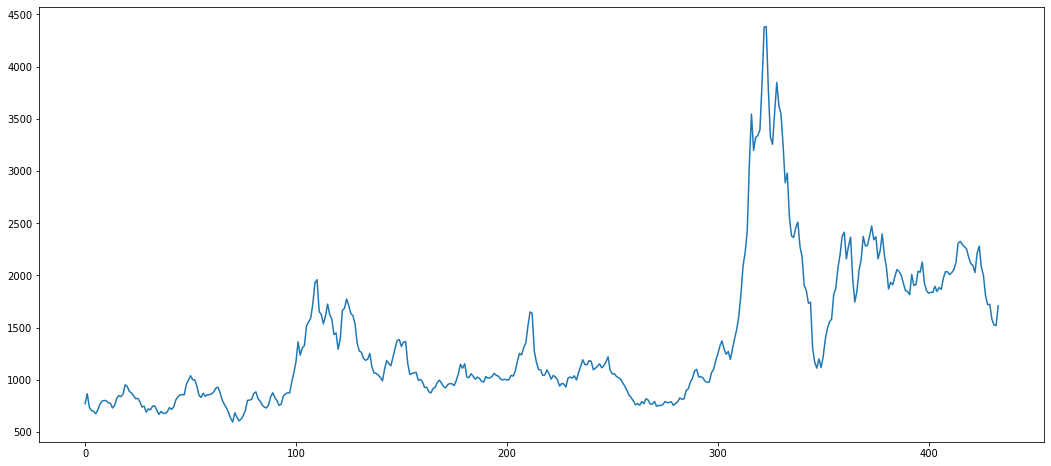

In [7]:
plt.figure(figsize=(18,8))
df_zinc['Price'].plot()

The simplest way to improve accuracy is to increase the number of generations max_generations=15. Each generation tries new models, taking additional time but improving the accuracy. The nature of genetic algorithms, however, means there is no consistent improvement for each generation, and large number of generations will often only result in minimal performance gains.
Another approach that may improve accuracy is to set ensemble='all'. Ensemble parameter expects a single string, and can for example be 'simple,dist', or 'horizontal'. As this means storing more details of every model, this takes more time and memory.


In [8]:
from autots import AutoTS
model=AutoTS(forecast_length=24,
    frequency='infer',
    prediction_interval=0.9,
    ensemble=None,
    model_list="fast_parallel",  # "superfast", "default", "fast_parallel"
    transformer_list="fast",  # "superfast",
    max_generations=8,
    num_validations=2,
    constraint=2.0, 
    validation_method="backwards")
model=model.fit(
    df_zinc,
    date_col='Date',
    value_col='Price'
)

Inferred frequency is: MS
Model Number: 1 with model ARIMA in generation 0 of 8
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.05109D+00    |proj g|=  2.70453D-01

At iterate    1    f=  6.01412D+00    |proj g|=  6.34479D-02


 This problem is unconstrained.



At iterate    2    f=  6.01062D+00    |proj g|=  1.76789D-02

At iterate    3    f=  6.01017D+00    |proj g|=  3.11581D-03

At iterate    4    f=  6.01016D+00    |proj g|=  1.21498D-03

At iterate    5    f=  6.01016D+00    |proj g|=  4.40177D-04

At iterate    6    f=  6.01016D+00    |proj g|=  3.08501D-04

At iterate    7    f=  6.01016D+00    |proj g|=  1.05018D-03

At iterate    8    f=  6.01015D+00    |proj g|=  1.87022D-03

At iterate    9    f=  6.01014D+00    |proj g|=  3.36647D-03

At iterate   10    f=  6.01012D+00    |proj g|=  6.26569D-03

At iterate   11    f=  6.01008D+00    |proj g|=  9.00835D-03

At iterate   12    f=  6.01005D+00    |proj g|=  1.30515D-02

At iterate   13    f=  6.00996D+00    |proj g|=  1.63188D-02

At iterate   14    f=  6.00973D+00    |proj g|=  2.06664D-02

At iterate   15    f=  6.00927D+00    |proj g|=  1.19417D-02

At iterate   16    f=  6.00903D+00    |proj g|=  1.15441D-02

At iterate   17    f=  6.00884D+00    |proj g|=  7.56962D-03

At iter

 This problem is unconstrained.



At iterate    6    f=  6.06105D+00    |proj g|=  3.65927D-02

At iterate    7    f=  6.06095D+00    |proj g|=  4.24609D-02

At iterate    8    f=  6.06033D+00    |proj g|=  5.31168D-02

At iterate    9    f=  6.05890D+00    |proj g|=  3.87399D-02

At iterate   10    f=  6.05710D+00    |proj g|=  1.99652D-02

At iterate   11    f=  6.05684D+00    |proj g|=  6.10849D-03

At iterate   12    f=  6.05682D+00    |proj g|=  7.22667D-03

At iterate   13    f=  6.05675D+00    |proj g|=  5.08514D-03

At iterate   14    f=  6.05673D+00    |proj g|=  1.07476D-03

At iterate   15    f=  6.05673D+00    |proj g|=  1.07121D-03

At iterate   16    f=  6.05672D+00    |proj g|=  1.07198D-03

At iterate   17    f=  6.05671D+00    |proj g|=  2.02929D-03

At iterate   18    f=  6.05669D+00    |proj g|=  3.78770D-03

At iterate   19    f=  6.05663D+00    |proj g|=  6.72378D-03

At iterate   20    f=  6.05648D+00    |proj g|=  1.08372D-02

At iterate   21    f=  6.05614D+00    |proj g|=  1.56018D-02

At iter

 This problem is unconstrained.



At iterate    1    f=  5.92650D+00    |proj g|=  5.63302D-02

At iterate    2    f=  5.92174D+00    |proj g|=  2.41653D-02

At iterate    3    f=  5.92006D+00    |proj g|=  9.89425D-03

At iterate    4    f=  5.91988D+00    |proj g|=  7.14034D-03

At iterate    5    f=  5.91974D+00    |proj g|=  6.93944D-03

At iterate    6    f=  5.91939D+00    |proj g|=  1.23378D-02

At iterate    7    f=  5.91872D+00    |proj g|=  2.63405D-02

At iterate    8    f=  5.91807D+00    |proj g|=  2.77584D-02

At iterate    9    f=  5.91775D+00    |proj g|=  2.48080D-02

At iterate   10    f=  5.91672D+00    |proj g|=  3.26423D-03

At iterate   11    f=  5.91669D+00    |proj g|=  2.77349D-03

At iterate   12    f=  5.91664D+00    |proj g|=  4.39528D-03

At iterate   13    f=  5.91648D+00    |proj g|=  8.58866D-03

At iterate   14    f=  5.91628D+00    |proj g|=  9.51666D-03

At iterate   15    f=  5.91484D+00    |proj g|=  4.51662D-02

At iterate   16    f=  5.91456D+00    |proj g|=  4.41739D-02

At iter

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 10 with model DatepartRegression in generation 0 of 8


2022-07-06 18:11:39.121036: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-07-06 18:11:39.889316: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
13/13 [==============================] - 7s 15ms/step - loss: 0.4056
Epoch 2/50
13/13 [==============================] - 0s 9ms/step - loss: 0.4049
Epoch 3/50
13/13 [==============================] - 0s 7ms/step - loss: 0.4050
Epoch 4/50
13/13 [==============================] - 0s 10ms/step - loss: 0.4050
Epoch 5/50
13/13 [==============================] - 0s 11ms/step - loss: 0.4068
Epoch 6/50
13/13 [==============================] - 0s 8ms/step - loss: 0.4042
Epoch 7/50
13/13 [==============================] - 0s 6ms/step - loss: 0.4057
Epoch 8/50
13/13 [==============================] - 0s 6ms/step - loss: 0.4063
Epoch 9/50
13/13 [==============================] - 0s 7ms/step - loss: 0.4046
Epoch 10/50
13/13 [==============================] - 0s 7ms/step - loss: 0.4042
Epoch 11/50
13/13 [==============================] - 0s 7ms/step - loss: 0.4035
Epoch 12/50
13/13 [==============================] - 0s 6ms/step - loss: 0.4042
Epoch 13/50
13/13 [===========================

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 33 with model FBProphet in generation 0 of 8
Initial log joint probability = -6.64073
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       227.241    9.4339e-05       69.0203      0.5897      0.5897      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     113       227.301   0.000454995       84.5825   4.951e-06       0.001      186  LS failed, Hessian reset 
     199       227.421   9.12715e-08        82.714      0.1559       0.409      294   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     239       227.546   0.000657791       94.1824   7.963e-06       0.001      385  LS failed, Hessian reset 
     299       227.631   3.15407e-05       74.0587       3.012      0.3012      457   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     336       227.633   3.25404e-06        85.48

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 51 with model NVAR in generation 0 of 8
Model Number: 52 with model Theta in generation 0 of 8
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.14186D+00    |proj g|=  1.09488D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4      5      1     0     0   8.539D-06   6.138D+00
  F =   6.1379846091638219     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model Number: 53 with model ARCH in generation 0 of 8
Template Eval Error: ImportErro

 This problem is unconstrained.


Model Number: 55 with model FBProphet in generation 0 of 8
Initial log joint probability = -7.43922
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       686.079     0.0197373         41.25           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       710.896      0.376284       159.562           1           1      250   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       717.867     0.0998662       60.7629     0.04908           1      366   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       721.251     0.0321774       10.1255           1           1      499   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       723.117     0.0145988       67.5685      0.9275      0.9275      622   
    I

 This problem is unconstrained.



At iterate    8    f= -2.24352D+00    |proj g|=  3.45440D+00

At iterate    9    f= -2.24673D+00    |proj g|=  6.72514D-01

At iterate   10    f= -2.24716D+00    |proj g|=  9.69753D-01

At iterate   11    f= -2.24729D+00    |proj g|=  7.81769D-01

At iterate   12    f= -2.24736D+00    |proj g|=  3.48237D-01

At iterate   13    f= -2.24738D+00    |proj g|=  1.16290D-02

At iterate   14    f= -2.24738D+00    |proj g|=  7.79406D-03

At iterate   15    f= -2.24738D+00    |proj g|=  7.75095D-03

At iterate   16    f= -2.24738D+00    |proj g|=  3.79061D-02

At iterate   17    f= -2.24738D+00    |proj g|=  7.55575D-02

At iterate   18    f= -2.24739D+00    |proj g|=  1.44382D-01

At iterate   19    f= -2.24740D+00    |proj g|=  2.50041D-01

At iterate   20    f= -2.24743D+00    |proj g|=  4.20515D-01

At iterate   21    f= -2.24749D+00    |proj g|=  6.77312D-01

At iterate   22    f= -2.24765D+00    |proj g|=  1.01833D+00

At iterate   23    f= -2.24793D+00    |proj g|=  1.29245D+00

At iter

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.194e+02, tolerance: 4.100e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Model Number: 63 with model ARDL in generation 0 of 8
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 63: ARDL
Model Number: 64 with model ARCH in generation 0 of 8
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 64: ARCH
Model Number: 65 with model ConstantNaive in generation 0 of 8
Model Number: 66 with model LastValueNaive in generation 0 of 8
Model Number: 67 with model AverageValueNaive in generation 0 of 8
Model Number: 68 with model GLS in generation 0 of 8
Template Eval Error: Exception('Transformer PCA failed on fit') in model 68: GLS
Model Number: 69 with model SeasonalNaive in generation 0 of 8
Model Number: 70 with model VAR in generation 0 of 8
Template Eval Error: ValueError('Only gave one variable to VAR') in model 70: VAR
Model Number: 71 with model VECM in generation 0 of 8
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 71: VE

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  FutureWarning,


Model Number: 73 with model DatepartRegression in generation 0 of 8


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.6s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 300 out of 300 | elapsed:    0.0s finished


Model Number: 74 with model SectionalMotif in generation 0 of 8
Model Number: 75 with model NVAR in generation 0 of 8
Model Number: 76 with model ARDL in generation 0 of 8
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 76: ARDL
Model Number: 77 with model DatepartRegression in generation 0 of 8
Model Number: 78 with model UnivariateMotif in generation 0 of 8


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Number: 79 with model GLS in generation 0 of 8
Model Number: 80 with model SectionalMotif in generation 0 of 8
Template Eval Error: ValueError('Model SectionalMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 80: SectionalMotif
Model Number: 81 with model ARCH in generation 0 of 8
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 81: ARCH
Model Number: 82 with model DatepartRegression in generation 0 of 8
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 82: DatepartRegression
Model Number: 83 with model Theta in generation 0 of 8


/opt/conda/lib/python3.7/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 84 with model ARCH in generation 0 of 8
Template Eval Error: Exception('Transformer RobustScaler failed on fit') in model 84: ARCH
Model Number: 85 with model LastValueNaive in generation 0 of 8
Model Number: 86 with model GLM in generation 0 of 8
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 86: GLM
Model Number: 87 with model AverageValueNaive in generation 0 of 8
Model Number: 88 with model SectionalMotif in generation 0 of 8
Template Eval Error: ValueError('kth(=100) out of bounds (39)') in model 88: SectionalMotif
Model Number: 89 with model ARDL in generation 0 of 8
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 89: ARDL
Model Number: 90 with model ARCH in generation 0 of 8


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1120: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)
/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1376: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  FutureWarning,


Template Eval Error: ImportError('`arch` package must be installed from pip') in model 90: ARCH
Model Number: 91 with model ARDL in generation 0 of 8
Model Number: 92 with model ETS in generation 0 of 8
Model Number: 93 with model ARCH in generation 0 of 8
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 93: ARCH
Model Number: 94 with model ETS in generation 0 of 8
Model Number: 95 with model UnivariateMotif in generation 0 of 8
Model Number: 96 with model MultivariateMotif in generation 0 of 8
Model Number: 97 with model VAR in generation 0 of 8
Template Eval Error: ValueError('Only gave one variable to VAR') in model 97: VAR
Model Number: 98 with model VAR in generation 0 of 8
Template Eval Error: ValueError('Only gave one variable to VAR') in model 98: VAR
Model Number: 99 with model UnobservedComponents in generation 0 of 8
Model Number: 100 with model UnivariateMotif in generation 0 of 8
Model Number: 101 with model UnobservedComponents in gen

 This problem is unconstrained.



At iterate    1    f= -4.44596D-02    |proj g|=  3.45511D-02

At iterate    2    f= -4.46277D-02    |proj g|=  2.69140D-02

At iterate    3    f= -4.50847D-02    |proj g|=  9.44595D-02

At iterate    4    f= -4.58096D-02    |proj g|=  1.43287D-01

At iterate    5    f= -4.64242D-02    |proj g|=  8.34595D-02

At iterate    6    f= -4.65969D-02    |proj g|=  1.34153D-02

At iterate    7    f= -4.66257D-02    |proj g|=  1.47131D-02

At iterate    8    f= -4.66446D-02    |proj g|=  2.72272D-02

At iterate    9    f= -4.66791D-02    |proj g|=  3.32811D-02

At iterate   10    f= -4.67212D-02    |proj g|=  1.86207D-02

At iterate   11    f= -4.67389D-02    |proj g|=  2.83149D-03

At iterate   12    f= -4.67420D-02    |proj g|=  6.69152D-03

At iterate   13    f= -4.67446D-02    |proj g|=  7.59136D-03

At iterate   14    f= -4.67491D-02    |proj g|=  3.33201D-03

At iterate   15    f= -4.67514D-02    |proj g|=  1.27550D-03

At iterate   16    f= -4.67526D-02    |proj g|=  6.98131D-03

At iter

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/extmath.py:985: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/opt/conda/lib/python3.7/site-packages/sklearn/utils/extmath.py:990: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
/opt/conda/lib/python3.7/site-packages/sklearn/utils/extmath.py:1020: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be rai

Model Number: 137 with model LastValueNaive in generation 0 of 8
Model Number: 138 with model GLS in generation 0 of 8
Model Number: 139 with model ETS in generation 0 of 8
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Price with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 140 with model VECM in generation 0 of 8
Template Eval Error: ValueError('Only gave one variable to VECM') in model 140: VECM
Model Number: 141 with model ConstantNaive in generation 0 of 8
Model Number: 142 with model SectionalMotif in generation 0 of 8
Model Number: 143 with model SeasonalNaive in generation 0 of 8
Model Number: 144 with model NVAR in generation 0 of 8
Model Number: 145 with model ARCH in generation 0 of 8
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 145: ARCH
Model Number: 146 with model VAR in generation 0 o

/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_regression.py:470: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 159 with model ARDL in generation 0 of 8
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 159: ARDL
Model Number: 160 with model VAR in generation 0 of 8
Template Eval Error: ValueError('Only gave one variable to VAR') in model 160: VAR
Model Number: 161 with model GLM in generation 0 of 8
Model Number: 162 with model ARDL in generation 0 of 8
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 162: ARDL
Model Number: 163 with model ConstantNaive in generation 0 of 8
New Generation: 1 of 8
Model Number: 164 with model GLS in generation 1 of 8
Model Number: 165 with model DatepartRegression in generation 1 of 8


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 166 with model LastValueNaive in generation 1 of 8
Model Number: 167 with model AverageValueNaive in generation 1 of 8
Model Number: 168 with model DatepartRegression in generation 1 of 8
Epoch 1/50
6/6 [==============================] - 5s 14ms/step - loss: nan
Epoch 2/50
6/6 [==============================] - 0s 13ms/step - loss: nan
Epoch 3/50
6/6 [==============================] - 0s 14ms/step - loss: nan
Epoch 4/50
6/6 [==============================] - 0s 14ms/step - loss: nan
Epoch 5/50
6/6 [==============================] - 0s 14ms/step - loss: nan
Epoch 6/50
6/6 [==============================] - 0s 15ms/step - loss: nan
Epoch 7/50
6/6 [==============================] - 0s 14ms/step - loss: nan
Epoch 8/50
6/6 [==============================] - 0s 14ms/step - loss: nan
Epoch 9/50
6/6 [==============================] - 0s 14ms/step - loss: nan
Epoch 10/50
6/6 [==============================] - 0s 14ms/step - loss: nan
Epoch 11/50
6/6 [==============================

 This problem is unconstrained.



At iterate    9    f= -5.48535D-01    |proj g|=  1.41468D-02

At iterate   10    f= -5.48540D-01    |proj g|=  1.36753D-02

At iterate   11    f= -5.48570D-01    |proj g|=  2.61766D-02

At iterate   12    f= -5.48666D-01    |proj g|=  5.35531D-02

At iterate   13    f= -5.48730D-01    |proj g|=  4.29543D-02

At iterate   14    f= -5.48776D-01    |proj g|=  7.16783D-03

At iterate   15    f= -5.48791D-01    |proj g|=  7.75686D-03

At iterate   16    f= -5.48794D-01    |proj g|=  2.40412D-02

At iterate   17    f= -5.48799D-01    |proj g|=  1.99552D-02

At iterate   18    f= -5.48807D-01    |proj g|=  5.26704D-03

At iterate   19    f= -5.48808D-01    |proj g|=  9.29834D-04

At iterate   20    f= -5.48808D-01    |proj g|=  8.15982D-04

At iterate   21    f= -5.48808D-01    |proj g|=  1.84936D-03

At iterate   22    f= -5.48808D-01    |proj g|=  1.41976D-03

At iterate   23    f= -5.48809D-01    |proj g|=  5.14610D-04

At iterate   24    f= -5.48809D-01    |proj g|=  1.63741D-04

At iter

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.5s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 300 out of 300 | elapsed:    0.1s finished


Model Number: 178 with model ARIMA in generation 1 of 8
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.78649D-01    |proj g|=  3.36913D-02

At iterate    1    f= -3.78989D-01    |proj g|=  1.86461D-01

At iterate    2    f= -3.79545D-01    |proj g|=  1.46065D-01

At iterate    3    f= -3.80397D-01    |proj g|=  1.87831D-02

At iterate    4    f= -3.80413D-01    |proj g|=  8.88981D-03

At iterate    5    f= -3.80438D-01    |proj g|=  1.91144D-02



 This problem is unconstrained.


At iterate    6    f= -3.80471D-01    |proj g|=  3.04525D-02

At iterate    7    f= -3.80501D-01    |proj g|=  2.10501D-02

At iterate    8    f= -3.80514D-01    |proj g|=  4.85362D-03

At iterate    9    f= -3.80520D-01    |proj g|=  9.27779D-03

At iterate   10    f= -3.80525D-01    |proj g|=  1.77689D-02

At iterate   11    f= -3.80541D-01    |proj g|=  3.26226D-02

At iterate   12    f= -3.80569D-01    |proj g|=  4.29692D-02

At iterate   13    f= -3.80612D-01    |proj g|=  5.97183D-02

At iterate   14    f= -3.80643D-01    |proj g|=  1.65522D-02

At iterate   15    f= -3.80684D-01    |proj g|=  1.39419D-02

At iterate   16    f= -3.80782D-01    |proj g|=  1.25080D-02

At iterate   17    f= -3.81049D-01    |proj g|=  4.04760D-02

At iterate   18    f= -3.81264D-01    |proj g|=  5.73001D-02

At iterate   19    f= -3.81432D-01    |proj g|=  6.91488D-03

At iterate   20    f= -3.81470D-01    |proj g|=  1.03527D-02

At iterate   21    f= -3.81495D-01    |proj g|=  1.21369D-02

At itera

 This problem is unconstrained.



At iterate    5    f= -4.27381D-01    |proj g|=  1.51930D-02

At iterate    6    f= -4.27385D-01    |proj g|=  4.66675D-03

At iterate    7    f= -4.27386D-01    |proj g|=  9.05962D-03

At iterate    8    f= -4.27390D-01    |proj g|=  2.03616D-02

At iterate    9    f= -4.27396D-01    |proj g|=  3.03707D-02

At iterate   10    f= -4.27408D-01    |proj g|=  3.55401D-02

At iterate   11    f= -4.27428D-01    |proj g|=  3.09501D-02

At iterate   12    f= -4.27477D-01    |proj g|=  1.41355D-02

At iterate   13    f= -4.27554D-01    |proj g|=  2.36123D-02

At iterate   14    f= -4.27653D-01    |proj g|=  6.89440D-02

At iterate   15    f= -4.27784D-01    |proj g|=  1.06578D-01

At iterate   16    f= -4.27913D-01    |proj g|=  9.66047D-02

At iterate   17    f= -4.27992D-01    |proj g|=  1.95928D-02

At iterate   18    f= -4.28049D-01    |proj g|=  9.79618D-03

At iterate   19    f= -4.28076D-01    |proj g|=  1.32554D-02

At iterate   20    f= -4.28140D-01    |proj g|=  1.18396D-02

At iter

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.5s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 300 out of 300 | elapsed:    0.0s finished


Model Number: 192 with model MultivariateMotif in generation 1 of 8
Model Number: 193 with model MultivariateMotif in generation 1 of 8
Model Number: 194 with model ARIMA in generation 1 of 8
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.37634D+01    |proj g|=  3.68257D+02

At iterate    1    f=  1.02080D+00    |proj g|=  8.57129D-01


 This problem is unconstrained.



At iterate    2    f= -1.33205D-02    |proj g|=  6.16214D-01

At iterate    3    f= -2.51474D-02    |proj g|=  1.03947D+00

At iterate    4    f= -5.23258D-02    |proj g|=  7.37442D-01

At iterate    5    f= -1.26084D-01    |proj g|=  6.13008D-01

At iterate    6    f= -3.54192D-01    |proj g|=  1.50171D+00

At iterate    7    f= -4.55103D-01    |proj g|=  9.90882D-01

At iterate    8    f= -5.12603D-01    |proj g|=  6.66508D-01

At iterate    9    f= -5.29917D-01    |proj g|=  1.05440D+00

At iterate   10    f= -5.53884D-01    |proj g|=  1.93581D-01

At iterate   11    f= -5.66206D-01    |proj g|=  2.45032D-01

At iterate   12    f= -5.81507D-01    |proj g|=  4.09589D-01

At iterate   13    f= -5.93994D-01    |proj g|=  6.70121D-02

At iterate   14    f= -5.94920D-01    |proj g|=  5.15049D-02

At iterate   15    f= -5.97093D-01    |proj g|=  5.92814D-02

At iterate   16    f= -5.98117D-01    |proj g|=  2.46929D-01

At iterate   17    f= -5.98605D-01    |proj g|=  1.49402D-02

At iter

 This problem is unconstrained.
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/conda/lib/python3.7/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 217 with model AverageValueNaive in generation 1 of 8
Template Eval Error: ValueError('Model AverageValueNaive returned NaN for one or more series. fail_on_forecast_nan=True') in model 217: AverageValueNaive
Model Number: 218 with model WindowRegression in generation 1 of 8
Model Number: 219 with model UnobservedComponents in generation 1 of 8
Model Number: 220 with model ARIMA in generation 1 of 8
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.79614D-02    |proj g|=  1.43874D-01

At iterate    1    f= -4.83588D-02    |proj g|=  3.60378D-02

At iterate    2    f= -4.88576D-02    |proj g|=  2.74609D-02

At iterate    3    f= -4.97087D-02    |proj g|=  9.63601D-03


 This problem is unconstrained.



At iterate    4    f= -4.99111D-02    |proj g|=  8.67118D-03

At iterate    5    f= -5.01862D-02    |proj g|=  6.18482D-03

At iterate    6    f= -5.02812D-02    |proj g|=  7.83645D-03

At iterate    7    f= -5.04075D-02    |proj g|=  6.16164D-03

At iterate    8    f= -5.05485D-02    |proj g|=  9.38069D-03

At iterate    9    f= -5.09335D-02    |proj g|=  1.92243D-02

At iterate   10    f= -5.11124D-02    |proj g|=  1.09789D-02

At iterate   11    f= -5.11819D-02    |proj g|=  3.64818D-03

At iterate   12    f= -5.11868D-02    |proj g|=  1.64536D-02

At iterate   13    f= -5.11935D-02    |proj g|=  5.64337D-03

At iterate   14    f= -5.11959D-02    |proj g|=  1.19044D-03

At iterate   15    f= -5.11969D-02    |proj g|=  1.19576D-03

At iterate   16    f= -5.11997D-02    |proj g|=  1.01256D-03

At iterate   17    f= -5.12049D-02    |proj g|=  1.11526D-03

At iterate   18    f= -5.12225D-02    |proj g|=  2.08472D-03

At iterate   19    f= -5.12417D-02    |proj g|=  4.06165D-03

At iter

 This problem is unconstrained.



At iterate    1    f=  6.09588D+00    |proj g|=  6.51719D-02

At iterate    2    f=  6.09122D+00    |proj g|=  2.66228D-02

At iterate    3    f=  6.08997D+00    |proj g|=  1.63764D-02

At iterate    4    f=  6.08953D+00    |proj g|=  1.66024D-02

At iterate    5    f=  6.08854D+00    |proj g|=  2.06473D-02

At iterate    6    f=  6.08638D+00    |proj g|=  4.85471D-02

At iterate    7    f=  6.08448D+00    |proj g|=  6.77475D-02

At iterate    8    f=  6.08120D+00    |proj g|=  5.71835D-02

At iterate    9    f=  6.07816D+00    |proj g|=  2.01873D-02

At iterate   10    f=  6.07784D+00    |proj g|=  3.48558D-02

At iterate   11    f=  6.07736D+00    |proj g|=  1.19935D-02

At iterate   12    f=  6.07718D+00    |proj g|=  1.16749D-02

At iterate   13    f=  6.07694D+00    |proj g|=  1.40584D-02

At iterate   14    f=  6.07661D+00    |proj g|=  1.71768D-02

At iterate   15    f=  6.07624D+00    |proj g|=  1.22960D-02

At iterate   16    f=  6.07585D+00    |proj g|=  5.71360D-03

At iter

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Number: 239 with model AverageValueNaive in generation 1 of 8
Model Number: 240 with model MultivariateMotif in generation 1 of 8
Model Number: 241 with model ARDL in generation 1 of 8
Model Number: 242 with model Theta in generation 1 of 8
Model Number: 243 with model LastValueNaive in generation 1 of 8
Model Number: 244 with model UnivariateMotif in generation 1 of 8
Model Number: 245 with model ARIMA in generation 1 of 8
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.32111D+00    |proj g|=  2.87865D+01

At iterate    1    f= -3.33091D+00    |proj g|=  7.38101D+00

At iterate    2    f= -3.33190D+00    |proj g|=  1.74225D+00

At iterate    3    f= -3.33195D+00    |proj g|=  1.90845D-01

At iterate    4    f= -3.33195D+00    |proj g|=  1.26009D-01

At iterate    5    f= -3.33195D+00    |proj g|=  1.30469D-01

At iterate    6    f= -3.3

 This problem is unconstrained.



At iterate    8    f= -3.33195D+00    |proj g|=  2.18804D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      8     24      1     0     0   2.188D-01  -3.332D+00
  F =  -3.3319496612842832     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 246 with model MultivariateMotif in generation 1 of 8
Model Number: 247 with model GLM in generation 1 of 8
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 247: GLM
Model Number: 248 with model D

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.4s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 300 out of 300 | elapsed:    0.0s finished
/opt/conda/lib/python3.7/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/opt/conda/lib/python3.7/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 249 with model LastValueNaive in generation 1 of 8
Model Number: 250 with model UnobservedComponents in generation 1 of 8
Model Number: 251 with model UnobservedComponents in generation 1 of 8
Model Number: 252 with model SeasonalNaive in generation 1 of 8
Model Number: 253 with model MultivariateMotif in generation 1 of 8
Model Number: 254 with model Theta in generation 1 of 8
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.74143D+00    |proj g|=  3.61664D+00

At iterate    5    f= -1.74609D+00    |proj g|=  9.89961D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient


 This problem is unconstrained.


Model Number: 258 with model NVAR in generation 1 of 8
Model Number: 259 with model ETS in generation 1 of 8
Model Number: 260 with model MultivariateMotif in generation 1 of 8
Model Number: 261 with model UnivariateMotif in generation 1 of 8
Model Number: 262 with model ARDL in generation 1 of 8
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 262: ARDL
Model Number: 263 with model MultivariateMotif in generation 1 of 8
Template Eval Error: ValueError('Model MultivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 263: MultivariateMotif
Model Number: 264 with model LastValueNaive in generation 1 of 8
Model Number: 265 with model ConstantNaive in generation 1 of 8
Model Number: 266 with model LastValueNaive in generation 1 of 8
Model Number: 267 with model ETS in generation 1 of 8


/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:412: RuntimeWarning: invalid value encountered in true_divide
  avg = np.multiply(a, wgt, dtype=result_dtype).sum(axis)/scl


Model Number: 268 with model FBProphet in generation 1 of 8
Initial log joint probability = -7.17877
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       393.695     0.0664652       83.2299      0.9687      0.9687      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       440.991     0.0312497       64.8981           1           1      230   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        495.32     0.0564911       303.115           1           1      351   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       509.055     0.0193809       93.5447           1           1      470   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       518.068     0.0402386       109.881           1           1      585   
    

/opt/conda/lib/python3.7/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/opt/conda/lib/python3.7/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
 This problem is unconstrained.



At iterate    1    f= -6.05193D-01    |proj g|=  2.88665D-02

At iterate    2    f= -6.05264D-01    |proj g|=  3.81654D-02

At iterate    3    f= -6.05723D-01    |proj g|=  9.02473D-02

At iterate    4    f= -6.05781D-01    |proj g|=  2.62117D-02

At iterate    5    f= -6.05787D-01    |proj g|=  4.91562D-03

At iterate    6    f= -6.05788D-01    |proj g|=  8.63137D-03

At iterate    7    f= -6.05792D-01    |proj g|=  2.18611D-02

At iterate    8    f= -6.05797D-01    |proj g|=  2.56191D-02

At iterate    9    f= -6.05803D-01    |proj g|=  1.57789D-02

At iterate   10    f= -6.05807D-01    |proj g|=  3.79653D-03

At iterate   11    f= -6.05808D-01    |proj g|=  9.92469D-03

At iterate   12    f= -6.05809D-01    |proj g|=  1.84917D-02

At iterate   13    f= -6.05812D-01    |proj g|=  2.89384D-02

At iterate   14    f= -6.05819D-01    |proj g|=  3.79187D-02

At iterate   15    f= -6.05829D-01    |proj g|=  3.57675D-02

At iterate   16    f= -6.05851D-01    |proj g|=  3.18452D-02

At iter

 This problem is unconstrained.



At iterate    4    f= -5.44610D-01    |proj g|=  5.10111D-02

At iterate    5    f= -5.44641D-01    |proj g|=  4.13067D-02

At iterate    6    f= -5.44670D-01    |proj g|=  1.73806D-02

At iterate    7    f= -5.44705D-01    |proj g|=  2.61646D-02

At iterate    8    f= -5.44727D-01    |proj g|=  4.63875D-02

At iterate    9    f= -5.44770D-01    |proj g|=  5.96495D-02

At iterate   10    f= -5.44850D-01    |proj g|=  5.99595D-02

At iterate   11    f= -5.45167D-01    |proj g|=  9.99263D-02

At iterate   12    f= -5.45487D-01    |proj g|=  8.45548D-02

At iterate   13    f= -5.45680D-01    |proj g|=  2.14696D-01

At iterate   14    f= -5.46122D-01    |proj g|=  2.05586D-02

At iterate   15    f= -5.46346D-01    |proj g|=  2.63225D-02

At iterate   16    f= -5.46488D-01    |proj g|=  4.04625D-02

At iterate   17    f= -5.46569D-01    |proj g|=  3.68980D-02

At iterate   18    f= -5.46578D-01    |proj g|=  4.21001D-03

At iterate   19    f= -5.46581D-01    |proj g|=  4.18268D-03

At iter

 This problem is unconstrained.



At iterate    9    f=  1.58825D+00    |proj g|=  1.24260D-03

At iterate   10    f=  1.58825D+00    |proj g|=  1.74246D-04

At iterate   11    f=  1.58825D+00    |proj g|=  5.00646D-05

At iterate   12    f=  1.58825D+00    |proj g|=  2.41468D-05

At iterate   13    f=  1.58825D+00    |proj g|=  1.77866D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     13     16      1     0     0   1.779D-05   1.588D+00
  F =   1.5882507766087706     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 299 with model LastValueNaive in generation 2 of 8
Model Number: 300 with model WindowRegression in

 This problem is unconstrained.



At iterate    3    f=  3.17191D+00    |proj g|=  5.63617D-02

At iterate    4    f=  3.17068D+00    |proj g|=  4.90644D-02

At iterate    5    f=  3.16869D+00    |proj g|=  6.84337D-02

At iterate    6    f=  3.16699D+00    |proj g|=  5.35704D-02

At iterate    7    f=  3.16617D+00    |proj g|=  1.68454D-02

At iterate    8    f=  3.16596D+00    |proj g|=  1.91592D-02

At iterate    9    f=  3.16569D+00    |proj g|=  1.95957D-02

At iterate   10    f=  3.16520D+00    |proj g|=  2.81677D-02

At iterate   11    f=  3.16443D+00    |proj g|=  3.66123D-02

At iterate   12    f=  3.16406D+00    |proj g|=  2.89915D-02

At iterate   13    f=  3.16318D+00    |proj g|=  2.85445D-02

At iterate   14    f=  3.16245D+00    |proj g|=  1.63579D-02

At iterate   15    f=  3.16208D+00    |proj g|=  2.16237D-02

At iterate   16    f=  3.16167D+00    |proj g|=  1.58319D-02

At iterate   17    f=  3.16143D+00    |proj g|=  1.12332D-02

At iterate   18    f=  3.16127D+00    |proj g|=  1.84646D-02

At iter

 This problem is unconstrained.



At iterate    4    f= -5.05583D-01    |proj g|=  1.00796D-01

At iterate    5    f= -5.05687D-01    |proj g|=  4.14348D-03

At iterate    6    f= -5.05691D-01    |proj g|=  1.11862D-02

At iterate    7    f= -5.05693D-01    |proj g|=  1.76702D-02

At iterate    8    f= -5.05703D-01    |proj g|=  2.94922D-02

At iterate    9    f= -5.05717D-01    |proj g|=  3.29023D-02

At iterate   10    f= -5.05761D-01    |proj g|=  3.96459D-02

At iterate   11    f= -5.05899D-01    |proj g|=  4.54964D-02

At iterate   12    f= -5.06133D-01    |proj g|=  5.53142D-02

At iterate   13    f= -5.06261D-01    |proj g|=  2.31558D-01

At iterate   14    f= -5.06626D-01    |proj g|=  8.40709D-02

At iterate   15    f= -5.06777D-01    |proj g|=  1.64815D-02

At iterate   16    f= -5.06834D-01    |proj g|=  6.28506D-03

At iterate   17    f= -5.06882D-01    |proj g|=  2.63367D-02

At iterate   18    f= -5.06919D-01    |proj g|=  1.90400D-02

At iterate   19    f= -5.06945D-01    |proj g|=  3.00223D-03

At iter

 This problem is unconstrained.



At iterate    2    f= -2.13629D+00    |proj g|=  3.40290D-02

At iterate    3    f= -2.13643D+00    |proj g|=  4.64247D-01

At iterate    4    f= -2.13669D+00    |proj g|=  9.31071D-01

At iterate    5    f= -2.13723D+00    |proj g|=  1.43054D+00

At iterate    6    f= -2.13788D+00    |proj g|=  1.35861D+00

At iterate    7    f= -2.13830D+00    |proj g|=  5.65533D-01

At iterate    8    f= -2.13837D+00    |proj g|=  5.83040D-02

At iterate    9    f= -2.13837D+00    |proj g|=  3.13550D-02

At iterate   10    f= -2.13837D+00    |proj g|=  4.38099D-02

At iterate   11    f= -2.13837D+00    |proj g|=  7.51046D-02

At iterate   12    f= -2.13838D+00    |proj g|=  1.15074D-01

At iterate   13    f= -2.13839D+00    |proj g|=  1.72338D-01

At iterate   14    f= -2.13842D+00    |proj g|=  2.27051D-01

At iterate   15    f= -2.13845D+00    |proj g|=  2.30107D-01

At iterate   16    f= -2.13845D+00    |proj g|=  1.97692D-01

At iterate   17    f= -2.13847D+00    |proj g|=  1.01442D-01

At iter

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1120: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)
/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1376: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  FutureWarning,


Model Number: 330 with model UnobservedComponents in generation 2 of 8
Model Number: 331 with model UnobservedComponents in generation 2 of 8
Model Number: 332 with model GLM in generation 2 of 8
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 332: GLM
Model Number: 333 with model ARIMA in generation 2 of 8
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.85773D-01    |proj g|=  4.17422D-02

At iterate    1    f= -1.86095D-01    |proj g|=  1.38818D-01

At iterate    2    f= -1.86581D-01    |proj g|=  1.23015D-01

At iterate    3    f= -1.88337D-01    |proj g|=  2.58778D-02

At iterate    4    f= -1.88381D-01    |proj g|=  8.06420D-03

At iterate    5    f= -1.88416D-01    |proj g|=  1.59935D-02


 This problem is unconstrained.



At iterate    6    f= -1.88450D-01    |proj g|=  1.83357D-02

At iterate    7    f= -1.88474D-01    |proj g|=  4.74280D-03

At iterate    8    f= -1.88484D-01    |proj g|=  6.89822D-03

At iterate    9    f= -1.88491D-01    |proj g|=  1.31544D-02

At iterate   10    f= -1.88510D-01    |proj g|=  2.14875D-02

At iterate   11    f= -1.88539D-01    |proj g|=  2.30285D-02

At iterate   12    f= -1.88627D-01    |proj g|=  1.60394D-02

At iterate   13    f= -1.88669D-01    |proj g|=  7.07954D-02

At iterate   14    f= -1.88830D-01    |proj g|=  4.21013D-02

At iterate   15    f= -1.88984D-01    |proj g|=  8.70524D-03

At iterate   16    f= -1.89039D-01    |proj g|=  8.35953D-03

At iterate   17    f= -1.89049D-01    |proj g|=  5.02311D-03

At iterate   18    f= -1.89062D-01    |proj g|=  7.05748D-03

At iterate   19    f= -1.89123D-01    |proj g|=  1.53958D-02

At iterate   20    f= -1.89238D-01    |proj g|=  4.71341D-02

At iterate   21    f= -1.89515D-01    |proj g|=  6.19040D-02

At iter

 This problem is unconstrained.



At iterate    2    f= -4.95683D-01    |proj g|=  9.76681D-01

At iterate    3    f= -4.99726D-01    |proj g|=  1.13315D+00

At iterate    4    f= -8.80688D-01    |proj g|=  4.64175D+00

At iterate    5    f= -1.14474D+00    |proj g|=  9.09230D+00

At iterate    6    f= -1.48276D+00    |proj g|=  6.68308D+00

At iterate    7    f= -1.55696D+00    |proj g|=  4.13292D+00

At iterate    8    f= -1.58180D+00    |proj g|=  6.45200D-01

At iterate    9    f= -1.58770D+00    |proj g|=  1.41302D+00

At iterate   10    f= -1.61137D+00    |proj g|=  4.44442D+00

At iterate   11    f= -1.67232D+00    |proj g|=  1.09100D+01

At iterate   12    f= -1.78164D+00    |proj g|=  1.14700D+01

At iterate   13    f= -1.97342D+00    |proj g|=  1.47766D+00

At iterate   14    f= -2.01569D+00    |proj g|=  9.07160D+00

At iterate   15    f= -2.03815D+00    |proj g|=  2.25926D+00

At iterate   16    f= -2.04289D+00    |proj g|=  1.91138D+00

At iterate   17    f= -2.05474D+00    |proj g|=  6.26009D-01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  345    f= -2.14281D+00    |proj g|=  4.11114D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11    345    467      2     0     0   4.111D-03  -2.143D+00
  F =  -2.1428125146259140     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 342 with model ARIMA in generation 2 of 8



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.89959D+00    |proj g|=  4.32383D+00


 This problem is unconstrained.



At iterate    1    f= -2.90053D+00    |proj g|=  6.68517D-01

At iterate    2    f= -2.90057D+00    |proj g|=  5.41361D-01

At iterate    3    f= -2.90065D+00    |proj g|=  2.46089D-01

At iterate    4    f= -2.90065D+00    |proj g|=  3.60459D-02

At iterate    5    f= -2.90065D+00    |proj g|=  3.60209D-02

At iterate    6    f= -2.90066D+00    |proj g|=  1.30620D-01

At iterate    7    f= -2.90066D+00    |proj g|=  2.65437D-01

At iterate    8    f= -2.90068D+00    |proj g|=  4.77252D-01

At iterate    9    f= -2.90072D+00    |proj g|=  8.12496D-01

At iterate   10    f= -2.90080D+00    |proj g|=  1.23177D+00

At iterate   11    f= -2.90097D+00    |proj g|=  1.64076D+00

At iterate   12    f= -2.90120D+00    |proj g|=  1.59244D+00

At iterate   13    f= -2.90121D+00    |proj g|=  1.79166D+00

At iterate   14    f= -2.90137D+00    |proj g|=  9.42929D-01

At iterate   15    f= -2.90142D+00    |proj g|=  1.86532D-01

At iterate   16    f= -2.90142D+00    |proj g|=  8.98103D-03

At iter

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3     47      2     0     0   3.503D-01  -4.058D+00
  F =  -4.0578310176104120     

ABNORMAL_TERMINATION_IN_LNSRCH                              
Model Number: 347 with model LastValueNaive in generation 2 of 8
Model Number: 348 with model ARDL in generation 2 of 8
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 348: ARDL
Model Number: 349 with model AverageValueNaive in generation 2 of 8



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


Model Number: 350 with model UnivariateMotif in generation 2 of 8
Model Number: 351 with model ARIMA in generation 2 of 8
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.54312D-01    |proj g|=  5.39194D-01


 This problem is unconstrained.



At iterate    1    f= -3.57074D-01    |proj g|=  9.63646D-02

At iterate    2    f= -3.57533D-01    |proj g|=  9.53890D-02

At iterate    3    f= -3.59636D-01    |proj g|=  3.11908D-01

At iterate    4    f= -3.62260D-01    |proj g|=  4.38211D-01

At iterate    5    f= -3.64666D-01    |proj g|=  2.55425D-01

At iterate    6    f= -3.65635D-01    |proj g|=  3.24322D-02

At iterate    7    f= -3.65931D-01    |proj g|=  9.86391D-02

At iterate    8    f= -3.66188D-01    |proj g|=  1.58426D-01

At iterate    9    f= -3.66698D-01    |proj g|=  1.89668D-01

At iterate   10    f= -3.67315D-01    |proj g|=  1.01747D-01

At iterate   11    f= -3.67593D-01    |proj g|=  2.04304D-02

At iterate   12    f= -3.67675D-01    |proj g|=  6.64139D-02

At iterate   13    f= -3.67815D-01    |proj g|=  1.18143D-01

At iterate   14    f= -3.68021D-01    |proj g|=  1.33810D-01

At iterate   15    f= -3.68391D-01    |proj g|=  1.75880D-01

At iterate   16    f= -3.69356D-01    |proj g|=  5.19148D-02

At iter

/opt/conda/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:1346: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Initial log joint probability = -10.4423
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       449.146     0.0254038      0.200924           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     154       449.148    0.00119872     0.0318694           1           1      201   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
Model Number: 366 with model ETS in generation 2 of 8
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Price with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 367 with model ARIMA in generation 2 of 8
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exa

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.960e+01, tolerance: 1.215e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
 This problem is unconstrained.



At iterate    2    f=  3.81447D-01    |proj g|=  2.82831D-01

At iterate    3    f=  3.59583D-01    |proj g|=  4.01173D-01

At iterate    4    f=  3.24599D-01    |proj g|=  3.43560D-01

At iterate    5    f=  3.03477D-01    |proj g|=  5.38889D-02

At iterate    6    f=  2.97860D-01    |proj g|=  4.27392D-02

At iterate    7    f=  2.92753D-01    |proj g|=  7.80769D-02

At iterate    8    f=  2.91170D-01    |proj g|=  2.16520D-02

At iterate    9    f=  2.90676D-01    |proj g|=  1.60489D-02

At iterate   10    f=  2.90109D-01    |proj g|=  9.78584D-03

At iterate   11    f=  2.89911D-01    |proj g|=  6.98572D-03

At iterate   12    f=  2.89745D-01    |proj g|=  3.66569D-03

At iterate   13    f=  2.89660D-01    |proj g|=  5.07215D-03

At iterate   14    f=  2.89631D-01    |proj g|=  2.46638D-02

At iterate   15    f=  2.89511D-01    |proj g|=  1.72244D-02

At iterate   16    f=  2.89187D-01    |proj g|=  8.45010D-03

At iterate   17    f=  2.88901D-01    |proj g|=  6.32302D-03

At iter

 This problem is unconstrained.



At iterate    9    f=  6.03930D+00    |proj g|=  1.67074D-02

At iterate   10    f=  6.03817D+00    |proj g|=  2.00908D-02

At iterate   11    f=  6.03781D+00    |proj g|=  3.02512D-02

At iterate   12    f=  6.03726D+00    |proj g|=  1.40161D-02

At iterate   13    f=  6.03709D+00    |proj g|=  1.00026D-02

At iterate   14    f=  6.03659D+00    |proj g|=  8.74443D-03

At iterate   15    f=  6.03623D+00    |proj g|=  1.18477D-02

At iterate   16    f=  6.03606D+00    |proj g|=  2.05505D-02

At iterate   17    f=  6.03574D+00    |proj g|=  1.06800D-02

At iterate   18    f=  6.03545D+00    |proj g|=  9.22494D-03

At iterate   19    f=  6.03465D+00    |proj g|=  1.03382D-02

At iterate   20    f=  6.03368D+00    |proj g|=  5.88327D-03

At iterate   21    f=  6.03358D+00    |proj g|=  6.78580D-03

At iterate   22    f=  6.03339D+00    |proj g|=  1.27634D-02

At iterate   23    f=  6.03319D+00    |proj g|=  1.32394D-02

At iterate   24    f=  6.03272D+00    |proj g|=  5.74389D-03

At iter

 This problem is unconstrained.



At iterate    5    f= -2.21200D+00    |proj g|=  4.56564D-01

At iterate    6    f= -2.21210D+00    |proj g|=  7.54877D-01

At iterate    7    f= -2.21229D+00    |proj g|=  1.07338D+00

At iterate    8    f= -2.21259D+00    |proj g|=  1.16985D+00

At iterate    9    f= -2.21285D+00    |proj g|=  7.64969D-01

At iterate   10    f= -2.21294D+00    |proj g|=  2.12311D-01

At iterate   11    f= -2.21296D+00    |proj g|=  1.09866D-02

At iterate   12    f= -2.21296D+00    |proj g|=  1.20803D-02

At iterate   13    f= -2.21296D+00    |proj g|=  1.07607D-02

At iterate   14    f= -2.21301D+00    |proj g|=  1.64227D-01

At iterate   15    f= -2.21304D+00    |proj g|=  8.15611D-02

At iterate   16    f= -2.21305D+00    |proj g|=  1.31755D-02

At iterate   17    f= -2.21305D+00    |proj g|=  1.30097D-03

At iterate   18    f= -2.21305D+00    |proj g|=  1.23604D-03

At iterate   19    f= -2.21305D+00    |proj g|=  3.47288D-03

At iterate   20    f= -2.21305D+00    |proj g|=  3.67392D-03

At iter

 This problem is unconstrained.


New Generation: 3 of 8
Model Number: 384 with model ARIMA in generation 3 of 8
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 384: ARIMA
Model Number: 385 with model Theta in generation 3 of 8
Model Number: 386 with model NVAR in generation 3 of 8
Model Number: 387 with model AverageValueNaive in generation 3 of 8
Model Number: 388 with model UnivariateMotif in generation 3 of 8
Model Number: 389 with model UnivariateMotif in generation 3 of 8
Model Number: 390 with model ETS in generation 3 of 8
Model Number: 391 with model LastValueNaive in generation 3 of 8
Model Number: 392 with model ARDL in generation 3 of 8
Model Number: 393 with model SectionalMotif in generation 3 of 8
Model Number: 394 with model AverageValueNaive in generation 3 of 8
Model Number: 395 with model MultivariateMotif in generation 3 of 8
Model Number: 396 with model MultivariateMotif in generation 3 of 8
Model Number: 397 with model UnivariateMotif in generat

 This problem is unconstrained.



At iterate    6    f= -1.16101D+00    |proj g|=  1.87765D+00

At iterate    7    f= -1.16892D+00    |proj g|=  2.07694D+00

At iterate    8    f= -1.17656D+00    |proj g|=  1.04505D+00

At iterate    9    f= -1.17855D+00    |proj g|=  1.59435D-01

At iterate   10    f= -1.17873D+00    |proj g|=  1.04512D-01

At iterate   11    f= -1.17880D+00    |proj g|=  2.01523D-01

At iterate   12    f= -1.17902D+00    |proj g|=  3.77478D-01

At iterate   13    f= -1.17944D+00    |proj g|=  5.54150D-01

At iterate   14    f= -1.18018D+00    |proj g|=  6.40734D-01

At iterate   15    f= -1.18090D+00    |proj g|=  4.05088D-01

At iterate   16    f= -1.18114D+00    |proj g|=  1.22832D-01

At iterate   17    f= -1.18120D+00    |proj g|=  1.56690D-02

At iterate   18    f= -1.18120D+00    |proj g|=  1.43983D-02

At iterate   19    f= -1.18216D+00    |proj g|=  1.66182D-02

At iterate   20    f= -1.18431D+00    |proj g|=  4.27373D-02

At iterate   21    f= -1.18676D+00    |proj g|=  6.86016D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 408 with model NVAR in generation 3 of 8
Model Number: 409 with model MultivariateMotif in generation 3 of 8
Model Number: 410 with model ARIMA in generation 3 of 8
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.73815D-01    |proj g|=  9.59667D-02

At iterate    1    f= -5.73870D-01    |proj g|=  3.09838D-02

At iterate    2    f= -5.73930D-01    |proj g|=  4.53247D-02

At iterate    3    f= -5.74179D-01    |proj g|=  1.26065D-01

At iterate    4    f= -5.74411D-01    |proj g|=  1.21844D-01


 This problem is unconstrained.



At iterate    5    f= -5.74522D-01    |proj g|=  5.51722D-03

At iterate    6    f= -5.74522D-01    |proj g|=  1.56613D-03

At iterate    7    f= -5.74522D-01    |proj g|=  1.56439D-03

At iterate    8    f= -5.74522D-01    |proj g|=  4.53736D-03

At iterate    9    f= -5.74523D-01    |proj g|=  7.84418D-03

At iterate   10    f= -5.74523D-01    |proj g|=  9.39551D-03

At iterate   11    f= -5.74524D-01    |proj g|=  8.17489D-03

At iterate   12    f= -5.74527D-01    |proj g|=  3.72689D-03

At iterate   13    f= -5.74531D-01    |proj g|=  4.04991D-03

At iterate   14    f= -5.74537D-01    |proj g|=  1.19383D-02

At iterate   15    f= -5.74542D-01    |proj g|=  2.22763D-02

At iterate   16    f= -5.74548D-01    |proj g|=  1.36027D-02

At iterate   17    f= -5.74554D-01    |proj g|=  4.64524D-03

At iterate   18    f= -5.74556D-01    |proj g|=  1.17483D-02

At iterate   19    f= -5.74562D-01    |proj g|=  2.26263D-02

At iterate   20    f= -5.74571D-01    |proj g|=  2.44208D-02

At iter

 This problem is unconstrained.



At iterate   11    f= -2.12124D+00    |proj g|=  1.39881D-02

At iterate   12    f= -2.12124D+00    |proj g|=  1.45808D-02

At iterate   13    f= -2.12142D+00    |proj g|=  1.24778D-01

At iterate   14    f= -2.12152D+00    |proj g|=  2.49168D-02

At iterate   15    f= -2.12152D+00    |proj g|=  5.62886D-03

At iterate   16    f= -2.12152D+00    |proj g|=  5.58707D-02

At iterate   17    f= -2.12153D+00    |proj g|=  1.00238D-01

At iterate   18    f= -2.12154D+00    |proj g|=  1.61180D-01

At iterate   19    f= -2.12155D+00    |proj g|=  1.72653D-01

At iterate   20    f= -2.12156D+00    |proj g|=  9.22510D-02

At iterate   21    f= -2.12156D+00    |proj g|=  1.64942D-02

At iterate   22    f= -2.12156D+00    |proj g|=  1.33084D-02

At iterate   23    f= -2.12156D+00    |proj g|=  2.11067D-02

At iterate   24    f= -2.12156D+00    |proj g|=  3.03941D-02

At iterate   25    f= -2.12156D+00    |proj g|=  4.30628D-02

At iterate   26    f= -2.12157D+00    |proj g|=  6.59564D-02

At iter

[LightGBM] [Fatal] [gamma]: at least one target label is negative
[LightGBM] [Fatal] [gamma]: at least one target label is negative
[LightGBM] [Fatal] [gamma]: at least one target label is negative
[LightGBM] [Fatal] [gamma]: at least one target label is negative
[LightGBM] [Fatal] [gamma]: at least one target label is negative


Template Eval Error: LightGBMError('[gamma]: at least one target label is negative') in model 425: WindowRegression
Model Number: 426 with model Theta in generation 3 of 8
Model Number: 427 with model ARIMA in generation 3 of 8
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.13711D+01    |proj g|=  4.37737D+03

At iterate    1    f=  9.71077D-01    |proj g|=  9.21692D-01

At iterate    2    f= -6.97340D-01    |proj g|=  1.03414D+00


 This problem is unconstrained.



At iterate    3    f= -6.99506D-01    |proj g|=  9.18971D-01

At iterate    4    f= -1.00886D+00    |proj g|=  1.67428D+00

At iterate    5    f= -1.14295D+00    |proj g|=  5.10798D+00

At iterate    6    f= -1.42117D+00    |proj g|=  1.21500D+01

At iterate    7    f= -1.76937D+00    |proj g|=  2.53418D+00

At iterate    8    f= -1.80370D+00    |proj g|=  4.10272D+00

At iterate    9    f= -1.82988D+00    |proj g|=  2.91760D+00

At iterate   10    f= -1.86366D+00    |proj g|=  6.42338D-01

At iterate   11    f= -1.88731D+00    |proj g|=  4.51757D-01

At iterate   12    f= -1.97956D+00    |proj g|=  1.39734D+01

At iterate   13    f= -2.01022D+00    |proj g|=  4.08285D+00

At iterate   14    f= -2.01616D+00    |proj g|=  1.59022D+00

At iterate   15    f= -2.01707D+00    |proj g|=  5.92614D-01

At iterate   16    f= -2.01725D+00    |proj g|=  2.38138D-01

At iterate   17    f= -2.01765D+00    |proj g|=  2.30192D-01

At iterate   18    f= -2.01983D+00    |proj g|=  1.14642D+00

At iter

 This problem is unconstrained.



At iterate    6    f= -3.47903D-01    |proj g|=  5.61574D-02

At iterate    7    f= -3.48026D-01    |proj g|=  7.12040D-02

At iterate    8    f= -3.48313D-01    |proj g|=  6.15539D-02

At iterate    9    f= -3.49172D-01    |proj g|=  5.73896D-02

At iterate   10    f= -3.51753D-01    |proj g|=  6.56671D-02

At iterate   11    f= -3.54536D-01    |proj g|=  7.11551D-02

At iterate   12    f= -3.56270D-01    |proj g|=  3.26012D-02

At iterate   13    f= -3.56874D-01    |proj g|=  1.61682D-01

At iterate   14    f= -3.57314D-01    |proj g|=  3.67455D-02

At iterate   15    f= -3.57549D-01    |proj g|=  2.37020D-02

At iterate   16    f= -3.57636D-01    |proj g|=  3.21277D-03

At iterate   17    f= -3.57646D-01    |proj g|=  2.93581D-03

At iterate   18    f= -3.57647D-01    |proj g|=  1.19042D-03

At iterate   19    f= -3.57648D-01    |proj g|=  6.50363D-04

At iterate   20    f= -3.57649D-01    |proj g|=  1.85174D-03

At iterate   21    f= -3.57651D-01    |proj g|=  4.06928D-03

At iter

 This problem is unconstrained.



At iterate    6    f=  6.30973D+00    |proj g|=  1.60759D-01

At iterate    7    f=  6.30376D+00    |proj g|=  1.35086D-01

At iterate    8    f=  6.29980D+00    |proj g|=  1.30269D-01

At iterate    9    f=  6.29171D+00    |proj g|=  1.24248D-01

At iterate   10    f=  6.28012D+00    |proj g|=  8.50189D-02

At iterate   11    f=  6.27150D+00    |proj g|=  7.15037D-02

At iterate   12    f=  6.26467D+00    |proj g|=  4.90309D-02

At iterate   13    f=  6.26160D+00    |proj g|=  5.22935D-02

At iterate   14    f=  6.25828D+00    |proj g|=  4.31560D-02

At iterate   15    f=  6.25551D+00    |proj g|=  2.11845D-02

At iterate   16    f=  6.25352D+00    |proj g|=  2.25308D-02

At iterate   17    f=  6.25236D+00    |proj g|=  1.09357D-02

At iterate   18    f=  6.25161D+00    |proj g|=  6.38963D-03

At iterate   19    f=  6.25105D+00    |proj g|=  8.99460D-03

At iterate   20    f=  6.25044D+00    |proj g|=  2.33260D-02

At iterate   21    f=  6.25007D+00    |proj g|=  2.00668D-02

At iter

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.6s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 300 out of 300 | elapsed:    0.1s finished


Model Number: 445 with model ARDL in generation 3 of 8
Template Eval Error: IndexError('tuple index out of range') in model 445: ARDL
Model Number: 446 with model WindowRegression in generation 3 of 8
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 446: WindowRegression
Model Number: 447 with model SeasonalNaive in generation 3 of 8
Model Number: 448 with model LastValueNaive in generation 3 of 8
Model Number: 449 with model LastValueNaive in generation 3 of 8
Model Number: 450 with model GLS in generation 3 of 8
Model Number: 451 with model UnobservedComponents in generation 3 of 8
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 451: UnobservedComponents
Model Number: 452 with model WindowRegression in generation 3 of 8
Model Number: 453 with model UnivariateMotif in generation 3 of 8


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 454 with model WindowRegression in generation 3 of 8
Model Number: 455 with model SectionalMotif in generation 3 of 8
Model Number: 456 with model ARIMA in generation 3 of 8
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.05940D+01    |proj g|=  6.93147D+04


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      1     21      1     0     0   6.931D+04  -1.059D+01
  F =  -10.593986931765556     

ABNORMAL_TERMINATION_IN_LNSRCH                              
Model Number: 457 with model WindowRegression in generation 3 of 8



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


Model Number: 458 with model ARDL in generation 3 of 8
Model Number: 459 with model Theta in generation 3 of 8
Model Number: 460 with model ETS in generation 3 of 8
ETS error ValueError('Can only dampen the trend component')
ETS failed on Price with ValueError('Can only dampen the trend component')
Model Number: 461 with model UnobservedComponents in generation 3 of 8
Model Number: 462 with model UnobservedComponents in generation 3 of 8
Model Number: 463 with model FBProphet in generation 3 of 8
Initial log joint probability = -33.5363
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      73       216.029   0.000153991       87.3853   1.701e-06       0.001      146  LS failed, Hessian reset 
      99       216.054   9.18165e-06       92.9243           1           1      181   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     124       216.055   4.03808e-06       94.2323   4.775e-08       0.001 

 This problem is unconstrained.



At iterate   12    f= -6.88236D-01    |proj g|=  4.49424D-04

At iterate   13    f= -6.88236D-01    |proj g|=  6.92513D-04

At iterate   14    f= -6.88236D-01    |proj g|=  1.13137D-03

At iterate   15    f= -6.88236D-01    |proj g|=  1.91702D-03

At iterate   16    f= -6.88236D-01    |proj g|=  2.21864D-03

At iterate   17    f= -6.88236D-01    |proj g|=  1.22429D-03

At iterate   18    f= -6.88236D-01    |proj g|=  2.22599D-04

At iterate   19    f= -6.88236D-01    |proj g|=  2.38615D-04

At iterate   20    f= -6.88236D-01    |proj g|=  6.71385D-04

At iterate   21    f= -6.88236D-01    |proj g|=  1.60356D-03

At iterate   22    f= -6.88236D-01    |proj g|=  2.42555D-03

At iterate   23    f= -6.88237D-01    |proj g|=  2.27126D-03

At iterate   24    f= -6.88237D-01    |proj g|=  6.36262D-03

At iterate   25    f= -6.88238D-01    |proj g|=  5.74855D-03

At iterate   26    f= -6.88240D-01    |proj g|=  4.56637D-03

At iterate   27    f= -6.88245D-01    |proj g|=  2.71781D-03

At iter

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1120: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)
/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1376: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  FutureWarning,


Model Number: 477 with model UnobservedComponents in generation 3 of 8
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 477: UnobservedComponents
Model Number: 478 with model UnobservedComponents in generation 3 of 8
Model Number: 479 with model GLS in generation 3 of 8
Model Number: 480 with model MultivariateMotif in generation 3 of 8
Model Number: 481 with model ETS in generation 3 of 8
ETS error ValueError('Can only dampen the trend component')
ETS failed on Price with ValueError('Can only dampen the trend component')
Model Number: 482 with model MultivariateMotif in generation 3 of 8
Model Number: 483 with model LastValueNaive in generation 3 of 8
Model Number: 484 with model ARIMA in generation 3 of 8
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.07829D+00    |proj g|=  3.34223D-02

At

 This problem is unconstrained.



At iterate    7    f=  6.07520D+00    |proj g|=  8.23055D-03

At iterate    8    f=  6.07502D+00    |proj g|=  7.49259D-03

At iterate    9    f=  6.07480D+00    |proj g|=  8.38299D-03

At iterate   10    f=  6.07454D+00    |proj g|=  1.17975D-02

At iterate   11    f=  6.07340D+00    |proj g|=  3.78152D-02

At iterate   12    f=  6.07157D+00    |proj g|=  5.66090D-02

At iterate   13    f=  6.06733D+00    |proj g|=  5.46191D-02

At iterate   14    f=  6.06391D+00    |proj g|=  3.08158D-02

At iterate   15    f=  6.06287D+00    |proj g|=  2.74401D-02

At iterate   16    f=  6.06224D+00    |proj g|=  2.08470D-02

At iterate   17    f=  6.06211D+00    |proj g|=  1.52319D-02

At iterate   18    f=  6.06182D+00    |proj g|=  7.90331D-03

At iterate   19    f=  6.06178D+00    |proj g|=  2.13322D-03

At iterate   20    f=  6.06178D+00    |proj g|=  1.58233D-03

At iterate   21    f=  6.06177D+00    |proj g|=  3.89161D-04

At iterate   22    f=  6.06177D+00    |proj g|=  3.90464D-04

At iter

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 486 with model SeasonalNaive in generation 3 of 8
Model Number: 487 with model UnobservedComponents in generation 3 of 8
Model Number: 488 with model AverageValueNaive in generation 3 of 8
Model Number: 489 with model AverageValueNaive in generation 3 of 8
Model Number: 490 with model AverageValueNaive in generation 3 of 8
Model Number: 491 with model GLM in generation 3 of 8
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 491: GLM
Model Number: 492 with model ARIMA in generation 3 of 8
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.85482D-01    |proj g|=  2.67169D-01

At iterate    1    f= -5.85834D-01    |proj g|=  2.22188D-02


/opt/conda/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:1346: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
 This problem is unconstrained.



At iterate    2    f= -5.85893D-01    |proj g|=  2.05484D-02

At iterate    3    f= -5.86189D-01    |proj g|=  7.40457D-02

At iterate    4    f= -5.86261D-01    |proj g|=  3.28669D-02

At iterate    5    f= -5.86279D-01    |proj g|=  8.88445D-03

At iterate    6    f= -5.86289D-01    |proj g|=  2.61418D-02

At iterate    7    f= -5.86308D-01    |proj g|=  5.55681D-02

At iterate    8    f= -5.86354D-01    |proj g|=  9.47230D-02

At iterate    9    f= -5.86438D-01    |proj g|=  1.25283D-01

At iterate   10    f= -5.86546D-01    |proj g|=  1.10496D-01

At iterate   11    f= -5.86667D-01    |proj g|=  6.18055D-02

At iterate   12    f= -5.86766D-01    |proj g|=  2.11486D-02

At iterate   13    f= -5.86797D-01    |proj g|=  4.75531D-02

At iterate   14    f= -5.86828D-01    |proj g|=  5.34348D-02

At iterate   15    f= -5.86871D-01    |proj g|=  1.55551D-02

At iterate   16    f= -5.86896D-01    |proj g|=  4.61597D-03

At iterate   17    f= -5.86924D-01    |proj g|=  1.67178D-02

At iter

[LightGBM] [Fatal] [tweedie]: at least one target label is negative
[LightGBM] [Fatal] [tweedie]: at least one target label is negative
[LightGBM] [Fatal] [tweedie]: at least one target label is negative
[LightGBM] [Fatal] [tweedie]: at least one target label is negative
[LightGBM] [Fatal] [tweedie]: at least one target label is negative
[LightGBM] [Fatal] [tweedie]: at least one target label is negative
[LightGBM] [Fatal] [tweedie]: at least one target label is negative
[LightGBM] [Fatal] [tweedie]: at least one target label is negative
[LightGBM] [Fatal] [tweedie]: at least one target label is negative
[LightGBM] [Fatal] [tweedie]: at least one target label is negative
[LightGBM] [Fatal] [tweedie]: at least one target label is negative
[LightGBM] [Fatal] [tweedie]: at least one target label is negative
[LightGBM] [Fatal] [tweedie]: at least one target label is negative
[LightGBM] [Fatal] [tweedie]: at least one target label is negative
[LightGBM] [Fatal] [tweedie]: at least one targe

Template Eval Error: LightGBMError('[tweedie]: at least one target label is negative') in model 495: WindowRegression
Model Number: 496 with model MultivariateMotif in generation 4 of 8
Model Number: 497 with model UnivariateMotif in generation 4 of 8
Model Number: 498 with model NVAR in generation 4 of 8


[LightGBM] [Fatal] [tweedie]: at least one target label is negative


Model Number: 499 with model WindowRegression in generation 4 of 8
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 499: WindowRegression
Model Number: 500 with model UnobservedComponents in generation 4 of 8
Model Number: 501 with model SectionalMotif in generation 4 of 8
Model Number: 502 with model ARDL in generation 4 of 8
Model Number: 503 with model NVAR in generation 4 of 8
Model Number: 504 with model GLS in generation 4 of 8
Model Number: 505 with model UnivariateMotif in generation 4 of 8
Model Number: 506 with model ARIMA in generation 4 of 8
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.56338D-01    |proj g|=  2.58436D+00


 This problem is unconstrained.



At iterate    1    f= -1.25030D+00    |proj g|=  1.48475D+01

At iterate    2    f= -1.29867D+00    |proj g|=  2.59110D+01

At iterate    3    f= -1.54671D+00    |proj g|=  3.12983D+01

At iterate    4    f= -1.77457D+00    |proj g|=  2.33469D+00

At iterate    5    f= -1.77916D+00    |proj g|=  1.74009D+00

At iterate    6    f= -1.78460D+00    |proj g|=  7.95149D-01

At iterate    7    f= -1.79364D+00    |proj g|=  7.74557D-01

At iterate    8    f= -1.81436D+00    |proj g|=  2.63780D+00

At iterate    9    f= -1.85935D+00    |proj g|=  5.68983D+00

At iterate   10    f= -1.94910D+00    |proj g|=  7.89245D+00

At iterate   11    f= -2.02735D+00    |proj g|=  4.57808D+00

At iterate   12    f= -2.03206D+00    |proj g|=  1.75814D-01

At iterate   13    f= -2.03273D+00    |proj g|=  1.46299D-01

At iterate   14    f= -2.03382D+00    |proj g|=  1.67057D-01

At iterate   15    f= -2.04879D+00    |proj g|=  7.65076D-01

At iterate   16    f= -2.05347D+00    |proj g|=  6.43703D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 508 with model Theta in generation 4 of 8
Model Number: 509 with model ETS in generation 4 of 8
ETS error ValueError('Can only dampen the trend component')
ETS failed on Price with ValueError('Can only dampen the trend component')
Model Number: 510 with model UnivariateMotif in generation 4 of 8
Model Number: 511 with model ARIMA in generation 4 of 8
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.13711D+01    |proj g|=  4.37737D+03

At iterate    1    f=  9.71077D-01    |proj g|=  9.21692D-01


 This problem is unconstrained.



At iterate    2    f= -6.97340D-01    |proj g|=  1.03414D+00

At iterate    3    f= -6.99506D-01    |proj g|=  9.18971D-01

At iterate    4    f= -1.00886D+00    |proj g|=  1.67428D+00

At iterate    5    f= -1.14295D+00    |proj g|=  5.10798D+00

At iterate    6    f= -1.42117D+00    |proj g|=  1.21500D+01

At iterate    7    f= -1.76937D+00    |proj g|=  2.53418D+00

At iterate    8    f= -1.80370D+00    |proj g|=  4.10272D+00

At iterate    9    f= -1.82988D+00    |proj g|=  2.91760D+00

At iterate   10    f= -1.86366D+00    |proj g|=  6.42338D-01

At iterate   11    f= -1.88731D+00    |proj g|=  4.51757D-01

At iterate   12    f= -1.97956D+00    |proj g|=  1.39734D+01

At iterate   13    f= -2.01022D+00    |proj g|=  4.08285D+00

At iterate   14    f= -2.01616D+00    |proj g|=  1.59022D+00

At iterate   15    f= -2.01707D+00    |proj g|=  5.92614D-01

At iterate   16    f= -2.01725D+00    |proj g|=  2.38138D-01

At iterate   17    f= -2.01765D+00    |proj g|=  2.30192D-01

At iter

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 515 with model FBProphet in generation 4 of 8
Initial log joint probability = -11.5738
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      37       429.654   0.000113725       542.481   2.504e-07       0.001       96  LS failed, Hessian reset 
      85        429.71   9.83237e-09       440.553      0.2499      0.2499      157   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
Model Number: 516 with model LastValueNaive in generation 4 of 8
Model Number: 517 with model ARIMA in generation 4 of 8
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.29156D+00    |proj g|=  1.33903D+00

At iterate    1    f= -2.29183D+00    |proj g|=  6.35720D-02


 This problem is unconstrained.



At iterate    2    f= -2.29183D+00    |proj g|=  2.41616D-02

At iterate    3    f= -2.29183D+00    |proj g|=  3.00031D-02

At iterate    4    f= -2.29184D+00    |proj g|=  1.34347D-01

At iterate    5    f= -2.29185D+00    |proj g|=  2.61349D-01

At iterate    6    f= -2.29188D+00    |proj g|=  4.75397D-01

At iterate    7    f= -2.29194D+00    |proj g|=  7.45392D-01

At iterate    8    f= -2.29208D+00    |proj g|=  9.74304D-01

At iterate    9    f= -2.29226D+00    |proj g|=  8.80352D-01

At iterate   10    f= -2.29237D+00    |proj g|=  4.12695D-01

At iterate   11    f= -2.29240D+00    |proj g|=  6.55421D-02

At iterate   12    f= -2.29240D+00    |proj g|=  1.18166D-02

At iterate   13    f= -2.29240D+00    |proj g|=  1.83070D-02

At iterate   14    f= -2.29240D+00    |proj g|=  2.58975D-02

At iterate   15    f= -2.29241D+00    |proj g|=  5.62185D-02

At iterate   16    f= -2.29242D+00    |proj g|=  1.01668D-01

At iterate   17    f= -2.29245D+00    |proj g|=  1.80501D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 519 with model LastValueNaive in generation 4 of 8
Model Number: 520 with model ETS in generation 4 of 8
Model Number: 521 with model FBProphet in generation 4 of 8
Initial log joint probability = -5.89367
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      81       628.462   0.000498742       86.8483   7.267e-06       0.001      151  LS failed, Hessian reset 
      99       628.539   2.97934e-05       85.2673      0.3819      0.3819      174   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       628.644   0.000991639       76.6015      0.7645      0.7645      295   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     203        628.65   7.38958e-05       82.7935   1.109e-06       0.001      338  LS failed, Hessian reset 
     245       628.655   4.33597e-06       61.3732   5.765e-08       0.001      432  LS failed, Hessian rese

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Number: 531 with model NVAR in generation 4 of 8
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 531: NVAR
Model Number: 532 with model ARIMA in generation 4 of 8
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.68458D+00    |proj g|=  2.12242D+01


 This problem is unconstrained.



At iterate    1    f= -1.74176D+00    |proj g|=  5.70498D+00

At iterate    2    f= -1.75818D+00    |proj g|=  3.54487D+00

At iterate    3    f= -1.76398D+00    |proj g|=  2.85344D+00

At iterate    4    f= -1.76693D+00    |proj g|=  4.65382D-01

At iterate    5    f= -1.77047D+00    |proj g|=  7.38367D-01

At iterate    6    f= -1.78936D+00    |proj g|=  5.56404D+00

At iterate    7    f= -1.81746D+00    |proj g|=  9.09768D+00

At iterate    8    f= -1.88565D+00    |proj g|=  1.20772D+01

At iterate    9    f= -1.92368D+00    |proj g|=  3.28474D+00

At iterate   10    f= -1.92965D+00    |proj g|=  8.94612D-01

At iterate   11    f= -1.93077D+00    |proj g|=  2.97574D-01

At iterate   12    f= -1.93133D+00    |proj g|=  8.29395D-01

At iterate   13    f= -1.93258D+00    |proj g|=  1.60648D+00

At iterate   14    f= -1.93556D+00    |proj g|=  2.68353D+00

At iterate   15    f= -1.94226D+00    |proj g|=  3.98545D+00

At iterate   16    f= -1.95495D+00    |proj g|=  5.01111D+00

At iter

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 542 with model UnobservedComponents in generation 4 of 8
Model Number: 543 with model LastValueNaive in generation 4 of 8
Model Number: 544 with model ETS in generation 4 of 8
ETS error ValueError('Can only dampen the trend component')
ETS failed on Price with ValueError('Can only dampen the trend component')
Model Number: 545 with model UnobservedComponents in generation 4 of 8
Model Number: 546 with model ARDL in generation 4 of 8
Model Number: 547 with model FBProphet in generation 4 of 8
Initial log joint probability = -23.6398
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       472.073   1.36078e-05       79.0868      0.6298      0.6298      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     118       472.388    0.00364763       113.485   3.332e-05       0.001      186  LS failed, Hessian reset 
     199       472.722   0.000506011       101.251           1    

 This problem is unconstrained.



At iterate    5    f= -3.28567D-02    |proj g|=  2.66625D-02

At iterate    6    f= -3.34278D-02    |proj g|=  3.12831D-02

At iterate    7    f= -3.38752D-02    |proj g|=  1.36603D-02

At iterate    8    f= -3.40943D-02    |proj g|=  9.21521D-03

At iterate    9    f= -3.44516D-02    |proj g|=  3.78841D-02

At iterate   10    f= -3.53191D-02    |proj g|=  7.96610D-02

At iterate   11    f= -3.75525D-02    |proj g|=  1.55188D-01

At iterate   12    f= -3.90424D-02    |proj g|=  9.83459D-02

At iterate   13    f= -4.18249D-02    |proj g|=  2.40836D-01

At iterate   14    f= -4.45673D-02    |proj g|=  1.66087D-01

At iterate   15    f= -4.63644D-02    |proj g|=  2.56346D-02

At iterate   16    f= -4.67376D-02    |proj g|=  1.81047D-02

At iterate   17    f= -4.71299D-02    |proj g|=  3.84362D-02

At iterate   18    f= -4.75523D-02    |proj g|=  3.11652D-02

At iterate   19    f= -4.79154D-02    |proj g|=  1.12262D-02

At iterate   20    f= -4.79407D-02    |proj g|=  2.31776D-03

At iter

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/extmath.py:985: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/opt/conda/lib/python3.7/site-packages/sklearn/utils/extmath.py:990: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
/opt/conda/lib/python3.7/site-packages/sklearn/utils/extmath.py:1020: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be rai


At iterate    1    f= -3.91006D-01    |proj g|=  2.76373D-02

At iterate    2    f= -3.91210D-01    |proj g|=  2.30497D-02

At iterate    3    f= -3.91865D-01    |proj g|=  1.06511D-02

At iterate    4    f= -3.92012D-01    |proj g|=  1.42741D-02

At iterate    5    f= -3.92231D-01    |proj g|=  4.17683D-03

At iterate    6    f= -3.92314D-01    |proj g|=  5.07996D-03

At iterate    7    f= -3.92867D-01    |proj g|=  8.30899D-03

At iterate    8    f= -3.92975D-01    |proj g|=  1.74713D-02

At iterate    9    f= -3.93219D-01    |proj g|=  5.93030D-03

At iterate   10    f= -3.93298D-01    |proj g|=  4.18391D-03

At iterate   11    f= -3.93346D-01    |proj g|=  3.39316D-03

At iterate   12    f= -3.93376D-01    |proj g|=  1.03235D-02

At iterate   13    f= -3.93385D-01    |proj g|=  2.10820D-02

At iterate   14    f= -3.93413D-01    |proj g|=  5.18590D-03

At iterate   15    f= -3.93456D-01    |proj g|=  1.06570D-02

At iterate   16    f= -3.93512D-01    |proj g|=  1.93603D-02

At iter

 This problem is unconstrained.



At iterate    5    f= -4.17370D-02    |proj g|=  2.05861D-02

At iterate    6    f= -4.17839D-02    |proj g|=  1.05357D-02

At iterate    7    f= -4.18816D-02    |proj g|=  1.90852D-02

At iterate    8    f= -4.20065D-02    |proj g|=  4.49057D-02

At iterate    9    f= -4.22048D-02    |proj g|=  6.35090D-02

At iterate   10    f= -4.24989D-02    |proj g|=  6.46382D-02

At iterate   11    f= -4.28922D-02    |proj g|=  8.08425D-02

At iterate   12    f= -4.32823D-02    |proj g|=  1.06381D-01

At iterate   13    f= -4.37351D-02    |proj g|=  3.83237D-02

At iterate   14    f= -4.38032D-02    |proj g|=  3.02292D-02

At iterate   15    f= -4.38282D-02    |proj g|=  3.52880D-03

At iterate   16    f= -4.38335D-02    |proj g|=  3.83527D-03

At iterate   17    f= -4.38637D-02    |proj g|=  7.40460D-03

At iterate   18    f= -4.39202D-02    |proj g|=  9.88254D-03

At iterate   19    f= -4.40977D-02    |proj g|=  7.98588D-03

At iterate   20    f= -4.44119D-02    |proj g|=  2.48921D-02

At iter

 This problem is unconstrained.



At iterate    3    f= -4.22381D-01    |proj g|=  1.66467D-02

At iterate    4    f= -4.22636D-01    |proj g|=  1.08645D-02

At iterate    5    f= -4.23341D-01    |proj g|=  2.52517D-02

At iterate    6    f= -4.23988D-01    |proj g|=  2.43690D-02

At iterate    7    f= -4.24616D-01    |proj g|=  2.83126D-02

At iterate    8    f= -4.25007D-01    |proj g|=  9.81425D-03

At iterate    9    f= -4.25425D-01    |proj g|=  2.79045D-02

At iterate   10    f= -4.26127D-01    |proj g|=  6.40010D-02

At iterate   11    f= -4.28411D-01    |proj g|=  1.36678D-01

At iterate   12    f= -4.29691D-01    |proj g|=  1.37281D-01

At iterate   13    f= -4.30713D-01    |proj g|=  3.24349D-01

At iterate   14    f= -4.33439D-01    |proj g|=  1.57825D-01

At iterate   15    f= -4.35356D-01    |proj g|=  3.59359D-02

At iterate   16    f= -4.36060D-01    |proj g|=  3.10572D-02

At iterate   17    f= -4.37371D-01    |proj g|=  4.65914D-02

At iterate   18    f= -4.38589D-01    |proj g|=  8.16094D-03

At iter

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Number: 590 with model UnivariateMotif in generation 4 of 8
Model Number: 591 with model UnivariateMotif in generation 4 of 8
Model Number: 592 with model SectionalMotif in generation 4 of 8
Model Number: 593 with model ARIMA in generation 4 of 8
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.84107D-02    |proj g|=  1.50050D-01

At iterate    1    f= -3.87944D-02    |proj g|=  2.78677D-02

At iterate    2    f= -3.90731D-02    |proj g|=  2.34999D-02


 This problem is unconstrained.



At iterate    3    f= -3.95250D-02    |proj g|=  9.00788D-03

At iterate    4    f= -3.96474D-02    |proj g|=  7.35464D-03

At iterate    5    f= -3.99737D-02    |proj g|=  9.14378D-03

At iterate    6    f= -4.00246D-02    |proj g|=  7.03554D-03

At iterate    7    f= -4.00499D-02    |proj g|=  2.99461D-03

At iterate    8    f= -4.00600D-02    |proj g|=  2.02974D-03

At iterate    9    f= -4.00688D-02    |proj g|=  2.62363D-03

At iterate   10    f= -4.00968D-02    |proj g|=  5.60450D-03

At iterate   11    f= -4.01578D-02    |proj g|=  9.05474D-03

At iterate   12    f= -4.02888D-02    |proj g|=  1.52795D-02

At iterate   13    f= -4.03283D-02    |proj g|=  2.38881D-02

At iterate   14    f= -4.04202D-02    |proj g|=  9.49245D-03

At iterate   15    f= -4.05269D-02    |proj g|=  5.63457D-03

At iterate   16    f= -4.05739D-02    |proj g|=  4.95449D-03

At iterate   17    f= -4.06264D-02    |proj g|=  3.14412D-03

At iterate   18    f= -4.06663D-02    |proj g|=  3.05669D-03

At iter

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.5s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 300 out of 300 | elapsed:    0.1s finished


Model Number: 598 with model GLS in generation 4 of 8
Model Number: 599 with model ETS in generation 4 of 8
Model Number: 600 with model DatepartRegression in generation 4 of 8
Model Number: 601 with model WindowRegression in generation 4 of 8


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Number: 602 with model LastValueNaive in generation 4 of 8
Model Number: 603 with model MultivariateMotif in generation 4 of 8
New Generation: 5 of 8
Model Number: 604 with model Theta in generation 5 of 8
Model Number: 605 with model LastValueNaive in generation 5 of 8
Model Number: 606 with model MultivariateMotif in generation 5 of 8
Model Number: 607 with model AverageValueNaive in generation 5 of 8
Model Number: 608 with model MultivariateMotif in generation 5 of 8
Model Number: 609 with model Theta in generation 5 of 8
Model Number: 610 with model Theta in generation 5 of 8
Model Number: 611 with model ConstantNaive in generation 5 of 8
Model Number: 612 with model MultivariateMotif in generation 5 of 8
Model Number: 613 with model ETS in generation 5 of 8
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Price with ValueError('endog must be strictly positive when usingmultiplicative trend or seasona

 This problem is unconstrained.



At iterate    2    f=  1.55402D-01    |proj g|=  5.35733D-01

At iterate    3    f=  1.42490D-01    |proj g|=  6.37229D-01

At iterate    4    f= -8.62399D-02    |proj g|=  1.88519D+00

At iterate    5    f= -2.47866D-01    |proj g|=  1.76718D+00

At iterate    6    f= -3.19074D-01    |proj g|=  1.01148D+00

At iterate    7    f= -3.26045D-01    |proj g|=  2.48119D-01

At iterate    8    f= -3.40204D-01    |proj g|=  1.92651D-01

At iterate    9    f= -3.53380D-01    |proj g|=  2.06262D-01

At iterate   10    f= -3.66492D-01    |proj g|=  1.17265D-01

At iterate   11    f= -3.70576D-01    |proj g|=  8.38181D-02

At iterate   12    f= -3.73835D-01    |proj g|=  3.73812D-02

At iterate   13    f= -3.75537D-01    |proj g|=  2.90497D-02

At iterate   14    f= -3.76362D-01    |proj g|=  5.33110D-02

At iterate   15    f= -3.77064D-01    |proj g|=  4.79024D-02

At iterate   16    f= -3.77135D-01    |proj g|=  8.67601D-03

At iterate   17    f= -3.77155D-01    |proj g|=  8.17846D-03

At iter

 This problem is unconstrained.



At iterate    6    f=  6.20704D+00    |proj g|=  4.75171D-02

At iterate    7    f=  6.20445D+00    |proj g|=  2.13837D-02

At iterate    8    f=  6.20393D+00    |proj g|=  2.18268D-02

At iterate    9    f=  6.20245D+00    |proj g|=  3.95260D-02

At iterate   10    f=  6.19997D+00    |proj g|=  6.93481D-02

At iterate   11    f=  6.19750D+00    |proj g|=  5.95535D-02

At iterate   12    f=  6.19490D+00    |proj g|=  5.28979D-02

At iterate   13    f=  6.19439D+00    |proj g|=  2.98941D-02

At iterate   14    f=  6.19269D+00    |proj g|=  3.59475D-02

At iterate   15    f=  6.19214D+00    |proj g|=  1.99720D-02

At iterate   16    f=  6.19170D+00    |proj g|=  1.13452D-02

At iterate   17    f=  6.19118D+00    |proj g|=  1.73265D-02

At iterate   18    f=  6.19083D+00    |proj g|=  1.90080D-02

At iterate   19    f=  6.19004D+00    |proj g|=  1.25768D-02

At iterate   20    f=  6.18954D+00    |proj g|=  3.13841D-02

At iterate   21    f=  6.18916D+00    |proj g|=  1.19637D-02

At iter

 This problem is unconstrained.



At iterate    6    f=  2.69598D+00    |proj g|=  2.16884D+00

At iterate    7    f=  2.08589D+00    |proj g|=  1.17693D+00

At iterate    8    f=  1.75138D+00    |proj g|=  6.63882D-01

At iterate    9    f=  1.53966D+00    |proj g|=  3.74019D-01

At iterate   10    f=  1.33208D+00    |proj g|=  4.26309D-01

At iterate   11    f=  9.00552D-01    |proj g|=  4.49789D-01

At iterate   12    f=  5.19086D-01    |proj g|=  2.48112D-01

At iterate   13    f=  4.56943D-01    |proj g|=  4.92645D-01

At iterate   14    f=  4.52004D-01    |proj g|=  4.00080D-01

At iterate   15    f=  4.39112D-01    |proj g|=  1.92532D-01

At iterate   16    f=  4.33085D-01    |proj g|=  1.06435D-01

At iterate   17    f=  4.25674D-01    |proj g|=  1.35252D-01

At iterate   18    f=  4.20757D-01    |proj g|=  3.49273D-02

At iterate   19    f=  4.20050D-01    |proj g|=  1.76928D-02

At iterate   20    f=  4.19530D-01    |proj g|=  1.45119D-02

At iterate   21    f=  4.19340D-01    |proj g|=  1.33220D-02

At iter

 This problem is unconstrained.



At iterate    2    f=  2.04528D-02    |proj g|=  6.12445D-01

At iterate    3    f= -2.08132D-01    |proj g|=  6.70769D-01
  ys=-7.887E-02  -gs= 3.405E-01 BFGS update SKIPPED

At iterate    4    f= -2.13474D-01    |proj g|=  3.60956D-01

At iterate    5    f= -2.31232D-01    |proj g|=  2.11289D-01

At iterate    6    f= -2.75845D-01    |proj g|=  1.36028D+00

At iterate    7    f= -2.91527D-01    |proj g|=  1.79579D-01

At iterate    8    f= -2.97469D-01    |proj g|=  1.79929D-01

At iterate    9    f= -3.08427D-01    |proj g|=  3.71747D-01

At iterate   10    f= -3.22203D-01    |proj g|=  2.64837D-01

At iterate   11    f= -3.25273D-01    |proj g|=  4.96206D-02

At iterate   12    f= -3.25940D-01    |proj g|=  4.74385D-02

At iterate   13    f= -3.26237D-01    |proj g|=  5.84065D-02

At iterate   14    f= -3.26654D-01    |proj g|=  3.18614D-02

At iterate   15    f= -3.27024D-01    |proj g|=  8.20397D-03

At iterate   16    f= -3.27163D-01    |proj g|=  2.04868D-02

At iterate   17  

 This problem is unconstrained.



At iterate    3    f= -2.28214D+00    |proj g|=  6.11414D-02

At iterate    4    f= -2.28214D+00    |proj g|=  1.71952D-01

At iterate    5    f= -2.28217D+00    |proj g|=  3.90431D-01

At iterate    6    f= -2.28224D+00    |proj g|=  6.56547D-01

At iterate    7    f= -2.28237D+00    |proj g|=  9.02964D-01

At iterate    8    f= -2.28254D+00    |proj g|=  8.48059D-01

At iterate    9    f= -2.28266D+00    |proj g|=  4.05797D-01

At iterate   10    f= -2.28269D+00    |proj g|=  4.91061D-02

At iterate   11    f= -2.28269D+00    |proj g|=  3.18273D-02

At iterate   12    f= -2.28269D+00    |proj g|=  4.59281D-02

At iterate   13    f= -2.28269D+00    |proj g|=  6.83190D-02

At iterate   14    f= -2.28270D+00    |proj g|=  1.05744D-01

At iterate   15    f= -2.28271D+00    |proj g|=  1.67392D-01

At iterate   16    f= -2.28273D+00    |proj g|=  2.57844D-01

At iterate   17    f= -2.28278D+00    |proj g|=  3.47739D-01

At iterate   18    f= -2.28285D+00    |proj g|=  3.21558D-01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  168    f= -2.28747D+00    |proj g|=  4.47868D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12    168    247      2     0     0   4.479D-03  -2.287D+00
  F =  -2.2874666259723924     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 656 with model SectionalMotif in generation 5 of 8



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 657 with model AverageValueNaive in generation 5 of 8
Model Number: 658 with model UnobservedComponents in generation 5 of 8
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 658: UnobservedComponents
Model Number: 659 with model AverageValueNaive in generation 5 of 8
Model Number: 660 with model ARDL in generation 5 of 8
Model Number: 661 with model Theta in generation 5 of 8
Model Number: 662 with model ARDL in generation 5 of 8
Model Number: 663 with model MultivariateMotif in generation 5 of 8
Model Number: 664 with model ARDL in generation 5 of 8
Model Number: 665 with model WindowRegression in generation 5 of 8
Model Number: 666 with model UnobservedComponents in generation 5 of 8
Model Number: 667 with model FBProphet in generation 5 of 8
Initial log joint probability = -41.0373
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       134.849     0.0413303      0.307

/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_regression.py:470: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 675 with model Theta in generation 5 of 8
Model Number: 676 with model UnivariateMotif in generation 5 of 8
Model Number: 677 with model ARIMA in generation 5 of 8
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.06737D+00    |proj g|=  2.84280D-02

At iterate    1    f=  6.06680D+00    |proj g|=  1.63088D-02

At iterate    2    f=  6.06652D+00    |proj g|=  6.93779D-03

At iterate    3    f=  6.06639D+00    |proj g|=  5.64484D-03


 This problem is unconstrained.



At iterate    4    f=  6.06614D+00    |proj g|=  8.53277D-03

At iterate    5    f=  6.06608D+00    |proj g|=  5.51751D-03

At iterate    6    f=  6.06606D+00    |proj g|=  2.59268D-03

At iterate    7    f=  6.06605D+00    |proj g|=  1.89502D-03

At iterate    8    f=  6.06602D+00    |proj g|=  2.85757D-03

At iterate    9    f=  6.06594D+00    |proj g|=  5.66407D-03

At iterate   10    f=  6.06580D+00    |proj g|=  9.40109D-03

At iterate   11    f=  6.06566D+00    |proj g|=  9.14537D-03

At iterate   12    f=  6.06559D+00    |proj g|=  6.20674D-03

At iterate   13    f=  6.06550D+00    |proj g|=  5.10187D-03

At iterate   14    f=  6.06546D+00    |proj g|=  2.30323D-03

At iterate   15    f=  6.06545D+00    |proj g|=  1.66151D-03

At iterate   16    f=  6.06544D+00    |proj g|=  1.81038D-03

At iterate   17    f=  6.06542D+00    |proj g|=  1.81993D-03

At iterate   18    f=  6.06541D+00    |proj g|=  4.12680D-03

At iterate   19    f=  6.06539D+00    |proj g|=  1.94475D-03

At iter

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Number: 715 with model AverageValueNaive in generation 6 of 8
Model Number: 716 with model MultivariateMotif in generation 6 of 8
Model Number: 717 with model GLS in generation 6 of 8
Model Number: 718 with model ARDL in generation 6 of 8
Model Number: 719 with model LastValueNaive in generation 6 of 8
Model Number: 720 with model WindowRegression in generation 6 of 8
Model Number: 721 with model MultivariateMotif in generation 6 of 8
Model Number: 722 with model AverageValueNaive in generation 6 of 8


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Number: 723 with model UnivariateMotif in generation 6 of 8
Model Number: 724 with model ARDL in generation 6 of 8
Model Number: 725 with model MultivariateMotif in generation 6 of 8
Model Number: 726 with model Theta in generation 6 of 8
Model Number: 727 with model GLM in generation 6 of 8
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 727: GLM
Model Number: 728 with model UnobservedComponents in generation 6 of 8


/opt/conda/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:1346: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 729 with model LastValueNaive in generation 6 of 8
Model Number: 730 with model NVAR in generation 6 of 8
Model Number: 731 with model Theta in generation 6 of 8
Model Number: 732 with model Theta in generation 6 of 8
Model Number: 733 with model ARIMA in generation 6 of 8
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.18180D-02    |proj g|=  1.50548D-01

At iterate    1    f= -4.22013D-02    |proj g|=  2.78836D-02

At iterate    2    f= -4.24780D-02    |proj g|=  2.52144D-02


 This problem is unconstrained.



At iterate    3    f= -4.29196D-02    |proj g|=  9.36094D-03

At iterate    4    f= -4.30411D-02    |proj g|=  7.42712D-03

At iterate    5    f= -4.33781D-02    |proj g|=  9.66153D-03

At iterate    6    f= -4.34179D-02    |proj g|=  7.94870D-03

At iterate    7    f= -4.34592D-02    |proj g|=  2.92439D-03

At iterate    8    f= -4.34659D-02    |proj g|=  1.80629D-03

At iterate    9    f= -4.34732D-02    |proj g|=  1.99244D-03

At iterate   10    f= -4.34921D-02    |proj g|=  3.94301D-03

At iterate   11    f= -4.35350D-02    |proj g|=  7.33495D-03

At iterate   12    f= -4.36331D-02    |proj g|=  1.02737D-02

At iterate   13    f= -4.36604D-02    |proj g|=  3.52490D-02

At iterate   14    f= -4.37562D-02    |proj g|=  1.40668D-02

At iterate   15    f= -4.38594D-02    |proj g|=  7.16186D-03

At iterate   16    f= -4.39384D-02    |proj g|=  5.36495D-03

At iterate   17    f= -4.39843D-02    |proj g|=  4.17254D-03

At iterate   18    f= -4.40432D-02    |proj g|=  4.77313D-03

At iter

 This problem is unconstrained.



At iterate    2    f=  7.67858D-04    |proj g|=  8.30628D-01

At iterate    3    f= -1.75303D-01    |proj g|=  6.41519D+00

At iterate    4    f= -3.33337D-01    |proj g|=  4.02465D+00

At iterate    5    f= -4.48856D-01    |proj g|=  9.23753D-01

At iterate    6    f= -4.74876D-01    |proj g|=  1.70091D+00

At iterate    7    f= -5.04120D-01    |proj g|=  2.17867D-01

At iterate    8    f= -5.14808D-01    |proj g|=  6.38663D-01

At iterate    9    f= -5.34219D-01    |proj g|=  1.00467D+00

At iterate   10    f= -5.49884D-01    |proj g|=  7.71987D-01

At iterate   11    f= -5.56834D-01    |proj g|=  1.36696D-01

At iterate   12    f= -5.57634D-01    |proj g|=  7.35231D-02

At iterate   13    f= -5.58578D-01    |proj g|=  2.98520D-01

At iterate   14    f= -5.59279D-01    |proj g|=  3.40301D-01

At iterate   15    f= -5.61124D-01    |proj g|=  2.60071D-01

At iterate   16    f= -5.62352D-01    |proj g|=  1.11432D-01

At iterate   17    f= -5.62528D-01    |proj g|=  1.94124D-02

At iter

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.5s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 300 out of 300 | elapsed:    0.0s finished


Model Number: 754 with model Theta in generation 6 of 8
Model Number: 755 with model SectionalMotif in generation 6 of 8
Model Number: 756 with model ARIMA in generation 6 of 8
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28537D+01    |proj g|=  1.29801D+02

At iterate    1    f=  1.02619D+00    |proj g|=  8.44447D-01


 This problem is unconstrained.



At iterate    2    f=  2.06503D-01    |proj g|=  5.85026D-01

At iterate    3    f=  1.94792D-01    |proj g|=  1.09219D+00

At iterate    4    f=  6.15164D-02    |proj g|=  5.68224D-01

At iterate    5    f= -3.13040D-02    |proj g|=  3.81270D+00

At iterate    6    f= -1.02325D-01    |proj g|=  8.58611D-01

At iterate    7    f= -1.12296D-01    |proj g|=  5.27672D-01

At iterate    8    f= -1.21979D-01    |proj g|=  3.71944D-01

At iterate    9    f= -1.27314D-01    |proj g|=  2.78235D-01

At iterate   10    f= -1.59719D-01    |proj g|=  2.80001D-01

At iterate   11    f= -1.67142D-01    |proj g|=  5.47405D-02

At iterate   12    f= -1.68942D-01    |proj g|=  5.63625D-02

At iterate   13    f= -1.71325D-01    |proj g|=  4.76384D-02

At iterate   14    f= -1.72539D-01    |proj g|=  1.23088D-02

At iterate   15    f= -1.72897D-01    |proj g|=  1.39392D-02

At iterate   16    f= -1.73038D-01    |proj g|=  6.58555D-03

At iterate   17    f= -1.73093D-01    |proj g|=  4.39132D-03

At iter

 This problem is unconstrained.



At iterate    3    f= -3.95250D-02    |proj g|=  9.00788D-03

At iterate    4    f= -3.96474D-02    |proj g|=  7.35464D-03

At iterate    5    f= -3.99737D-02    |proj g|=  9.14378D-03

At iterate    6    f= -4.00246D-02    |proj g|=  7.03554D-03

At iterate    7    f= -4.00499D-02    |proj g|=  2.99461D-03

At iterate    8    f= -4.00600D-02    |proj g|=  2.02974D-03

At iterate    9    f= -4.00688D-02    |proj g|=  2.62363D-03

At iterate   10    f= -4.00968D-02    |proj g|=  5.60450D-03

At iterate   11    f= -4.01578D-02    |proj g|=  9.05474D-03

At iterate   12    f= -4.02888D-02    |proj g|=  1.52795D-02

At iterate   13    f= -4.03283D-02    |proj g|=  2.38881D-02

At iterate   14    f= -4.04202D-02    |proj g|=  9.49245D-03

At iterate   15    f= -4.05269D-02    |proj g|=  5.63457D-03

At iterate   16    f= -4.05739D-02    |proj g|=  4.95449D-03

At iterate   17    f= -4.06264D-02    |proj g|=  3.14412D-03

At iterate   18    f= -4.06663D-02    |proj g|=  3.05669D-03

At iter

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1120: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)
/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1376: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  FutureWarning,


Model Number: 811 with model MultivariateMotif in generation 7 of 8
Model Number: 812 with model ARIMA in generation 7 of 8
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 812: ARIMA
Model Number: 813 with model UnobservedComponents in generation 7 of 8
Model Number: 814 with model SeasonalNaive in generation 7 of 8
Model Number: 815 with model Theta in generation 7 of 8
Model Number: 816 with model UnivariateMotif in generation 7 of 8
Model Number: 817 with model GLM in generation 7 of 8
Model Number: 818 with model WindowRegression in generation 7 of 8
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000091 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

 This problem is unconstrained.



At iterate    3    f= -5.45096D-01    |proj g|=  1.09896D-01

At iterate    4    f= -5.45271D-01    |proj g|=  3.58819D-02

At iterate    5    f= -5.45368D-01    |proj g|=  4.43519D-02

At iterate    6    f= -5.45430D-01    |proj g|=  7.76878D-02

At iterate    7    f= -5.45614D-01    |proj g|=  1.30130D-01

At iterate    8    f= -5.45810D-01    |proj g|=  1.27810D-01

At iterate    9    f= -5.46072D-01    |proj g|=  4.11876D-02

At iterate   10    f= -5.46111D-01    |proj g|=  2.26852D-02

At iterate   11    f= -5.46130D-01    |proj g|=  5.84792D-03

At iterate   12    f= -5.46148D-01    |proj g|=  2.48956D-02

At iterate   13    f= -5.46163D-01    |proj g|=  3.47120D-02

At iterate   14    f= -5.46197D-01    |proj g|=  3.36047D-02

At iterate   15    f= -5.46251D-01    |proj g|=  1.11120D-01

At iterate   16    f= -5.46352D-01    |proj g|=  7.88833D-02

At iterate   17    f= -5.46758D-01    |proj g|=  3.57120D-02

At iterate   18    f= -5.47089D-01    |proj g|=  9.40476D-02

At iter

/opt/conda/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:426: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/opt/conda/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Model Number: 828 with model MultivariateMotif in generation 7 of 8
Model Number: 829 with model UnivariateMotif in generation 7 of 8
Template Eval Error: Exception('Transformer QuantileTransformer failed on fit') in model 829: UnivariateMotif
Model Number: 830 with model NVAR in generation 7 of 8
Model Number: 831 with model ETS in generation 7 of 8


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1376: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  FutureWarning,


Model Number: 832 with model NVAR in generation 7 of 8
Model Number: 833 with model SectionalMotif in generation 7 of 8
Model Number: 834 with model AverageValueNaive in generation 7 of 8
Model Number: 835 with model UnivariateMotif in generation 7 of 8
Model Number: 836 with model ARIMA in generation 7 of 8
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.45456D-01    |proj g|=  3.00806D-01


 This problem is unconstrained.



At iterate    1    f=  4.41477D-01    |proj g|=  2.25160D-02

At iterate    2    f=  4.41398D-01    |proj g|=  1.23340D-02

At iterate    3    f=  4.41305D-01    |proj g|=  2.12121D-02

At iterate    4    f=  4.41175D-01    |proj g|=  1.93216D-02

At iterate    5    f=  4.41139D-01    |proj g|=  2.66008D-03

At iterate    6    f=  4.41135D-01    |proj g|=  2.47576D-03

At iterate    7    f=  4.41133D-01    |proj g|=  3.01099D-03

At iterate    8    f=  4.41130D-01    |proj g|=  1.59916D-03

At iterate    9    f=  4.41126D-01    |proj g|=  1.38091D-03

At iterate   10    f=  4.41119D-01    |proj g|=  2.77613D-03

At iterate   11    f=  4.41108D-01    |proj g|=  5.21499D-03

At iterate   12    f=  4.41082D-01    |proj g|=  7.80073D-03

At iterate   13    f=  4.41021D-01    |proj g|=  1.19233D-02

At iterate   14    f=  4.40910D-01    |proj g|=  7.35287D-03

At iterate   15    f=  4.40883D-01    |proj g|=  6.49362D-02

At iterate   16    f=  4.40665D-01    |proj g|=  1.44189D-02

At iter

 This problem is unconstrained.


Model Number: 844 with model MultivariateMotif in generation 7 of 8
Model Number: 845 with model SectionalMotif in generation 7 of 8
Model Number: 846 with model GLM in generation 7 of 8
Model Number: 847 with model GLS in generation 7 of 8


/opt/conda/lib/python3.7/site-packages/statsmodels/genmod/generalized_linear_model.py:301: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  DomainWarning)


Model Number: 848 with model ETS in generation 7 of 8
Model Number: 849 with model WindowRegression in generation 7 of 8
Model Number: 850 with model SectionalMotif in generation 7 of 8
Model Number: 851 with model UnivariateMotif in generation 7 of 8
Model Number: 852 with model UnivariateMotif in generation 7 of 8
Model Number: 853 with model ARDL in generation 7 of 8
Model Number: 854 with model LastValueNaive in generation 7 of 8
Template Eval Error: ValueError('Model LastValueNaive returned NaN for one or more series. fail_on_forecast_nan=True') in model 854: LastValueNaive
Model Number: 855 with model Theta in generation 7 of 8


/opt/conda/lib/python3.7/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 856 with model WindowRegression in generation 7 of 8
Model Number: 857 with model LastValueNaive in generation 7 of 8
Model Number: 858 with model WindowRegression in generation 7 of 8
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 858: WindowRegression
Model Number: 859 with model WindowRegression in generation 7 of 8
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 859: WindowRegression
Model Number: 860 with model DatepartRegression in generation 7 of 8


/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_regression.py:470: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Number: 861 with model ARDL in generation 7 of 8
Model Number: 862 with model SectionalMotif in generation 7 of 8
Model Number: 863 with model MultivariateMotif in generation 7 of 8
Model Number: 864 with model SectionalMotif in generation 7 of 8
Model Number: 865 with model UnobservedComponents in generation 7 of 8
Model Number: 866 with model ARDL in generation 7 of 8
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 866: ARDL
Model Number: 867 with model UnivariateMotif in generation 7 of 8
Template Eval Error: Exception('Transformer RobustScaler failed on fit') in model 867: UnivariateMotif
New Generation: 8 of 8


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1120: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)
/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1376: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  FutureWarning,


Model Number: 868 with model Theta in generation 8 of 8
Model Number: 869 with model UnivariateMotif in generation 8 of 8
Model Number: 870 with model Theta in generation 8 of 8
Model Number: 871 with model FBProphet in generation 8 of 8
Initial log joint probability = -8.02051
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       534.686   4.56254e-05       70.3181      0.3343           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     120       534.711   0.000130894       88.2205   1.619e-06       0.001      224  LS failed, Hessian reset 
     188       534.733   4.79554e-07       83.1473   6.151e-09       0.001      346  LS failed, Hessian reset 
     199       534.733   2.90377e-08       84.9038           1           1      363   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     203       534.733   4.43775e-09       79.594

 This problem is unconstrained.



At iterate    2    f= -5.04075D-01    |proj g|=  7.14451D-01

At iterate    3    f= -5.07781D-01    |proj g|=  1.04922D+00

At iterate    4    f= -7.26226D-01    |proj g|=  6.56210D-01

At iterate    5    f= -8.26616D-01    |proj g|=  4.02119D+00

At iterate    6    f= -9.23664D-01    |proj g|=  1.38377D+00

At iterate    7    f= -9.44387D-01    |proj g|=  1.21631D-01

At iterate    8    f= -9.50097D-01    |proj g|=  7.04433D-01

At iterate    9    f= -9.53981D-01    |proj g|=  4.42988D-01

At iterate   10    f= -9.57551D-01    |proj g|=  9.45554D-02

At iterate   11    f= -9.59814D-01    |proj g|=  1.99204D-01

At iterate   12    f= -9.62423D-01    |proj g|=  2.93761D-01

At iterate   13    f= -9.67599D-01    |proj g|=  2.24017D-01

At iterate   14    f= -9.72885D-01    |proj g|=  4.75635D-02

At iterate   15    f= -9.75335D-01    |proj g|=  1.04719D-01

At iterate   16    f= -9.76295D-01    |proj g|=  1.74964D-02

At iterate   17    f= -9.76487D-01    |proj g|=  2.25913D-02

At iter

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.5s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 300 out of 300 | elapsed:    0.0s finished


Model Number: 897 with model ARDL in generation 8 of 8
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 897: ARDL
Model Number: 898 with model ARDL in generation 8 of 8
Model Number: 899 with model AverageValueNaive in generation 8 of 8
Model Number: 900 with model AverageValueNaive in generation 8 of 8
Model Number: 901 with model Theta in generation 8 of 8
Model Number: 902 with model MultivariateMotif in generation 8 of 8
Model Number: 903 with model ARDL in generation 8 of 8
Model Number: 904 with model FBProphet in generation 8 of 8
Initial log joint probability = -19.4946
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       326.999   9.56471e-07       82.5882      0.1411      0.7163      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     129       326.999   2.18694e-06       89.8959   2.419e-08       0.001      210  LS fail

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature na

Model Number: 909 with model MultivariateMotif in generation 8 of 8
Model Number: 910 with model ARIMA in generation 8 of 8
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.31865D-01    |proj g|=  2.00055D-01

At iterate    1    f= -4.32125D-01    |proj g|=  1.29536D-02

At iterate    2    f= -4.32129D-01    |proj g|=  9.45893D-03


 This problem is unconstrained.



At iterate    3    f= -4.32135D-01    |proj g|=  1.41012D-02

At iterate    4    f= -4.32151D-01    |proj g|=  3.49815D-02

At iterate    5    f= -4.32174D-01    |proj g|=  4.53451D-02

At iterate    6    f= -4.32203D-01    |proj g|=  3.22335D-02

At iterate    7    f= -4.32229D-01    |proj g|=  9.63199D-03

At iterate    8    f= -4.32251D-01    |proj g|=  2.68390D-02

At iterate    9    f= -4.32275D-01    |proj g|=  5.33742D-02

At iterate   10    f= -4.32327D-01    |proj g|=  8.60066D-02

At iterate   11    f= -4.32415D-01    |proj g|=  1.05197D-01

At iterate   12    f= -4.32560D-01    |proj g|=  9.72589D-02

At iterate   13    f= -4.32896D-01    |proj g|=  1.11996D-01

At iterate   14    f= -4.33347D-01    |proj g|=  7.98315D-02

At iterate   15    f= -4.33479D-01    |proj g|=  2.42957D-02

At iterate   16    f= -4.34061D-01    |proj g|=  3.69750D-02

At iterate   17    f= -4.34182D-01    |proj g|=  2.37866D-02

At iterate   18    f= -4.34234D-01    |proj g|=  5.42819D-03

At iter

 This problem is unconstrained.



At iterate    4    f= -4.31052D-01    |proj g|=  7.46706D-02

At iterate    5    f= -4.31142D-01    |proj g|=  1.38353D-02

At iterate    6    f= -4.31180D-01    |proj g|=  3.55503D-02

At iterate    7    f= -4.31227D-01    |proj g|=  7.08312D-02

At iterate    8    f= -4.31345D-01    |proj g|=  1.19637D-01

At iterate    9    f= -4.31528D-01    |proj g|=  1.44069D-01

At iterate   10    f= -4.31732D-01    |proj g|=  1.02646D-01

At iterate   11    f= -4.31829D-01    |proj g|=  2.69075D-02

At iterate   12    f= -4.31848D-01    |proj g|=  1.25090D-02

At iterate   13    f= -4.31853D-01    |proj g|=  2.33359D-02

At iterate   14    f= -4.31865D-01    |proj g|=  3.38609D-02

At iterate   15    f= -4.31891D-01    |proj g|=  4.18488D-02

At iterate   16    f= -4.31936D-01    |proj g|=  3.29004D-02

At iterate   17    f= -4.31984D-01    |proj g|=  1.45170D-02

At iterate   18    f= -4.32022D-01    |proj g|=  6.91477D-03

At iterate   19    f= -4.32075D-01    |proj g|=  3.56498D-02

At iter

 This problem is unconstrained.



At iterate    7    f=  6.08061D+00    |proj g|=  1.73236D-02

At iterate    8    f=  6.07991D+00    |proj g|=  3.12558D-02

At iterate    9    f=  6.07805D+00    |proj g|=  5.33258D-02

At iterate   10    f=  6.07603D+00    |proj g|=  7.41142D-02

At iterate   11    f=  6.07420D+00    |proj g|=  6.49257D-02

At iterate   12    f=  6.07203D+00    |proj g|=  5.00331D-02

At iterate   13    f=  6.06962D+00    |proj g|=  2.54684D-02

At iterate   14    f=  6.06865D+00    |proj g|=  1.06116D-02

At iterate   15    f=  6.06819D+00    |proj g|=  7.62959D-03

At iterate   16    f=  6.06807D+00    |proj g|=  4.48257D-03

At iterate   17    f=  6.06797D+00    |proj g|=  2.10323D-03

At iterate   18    f=  6.06792D+00    |proj g|=  3.80110D-03

At iterate   19    f=  6.06790D+00    |proj g|=  2.12673D-03

At iterate   20    f=  6.06789D+00    |proj g|=  4.61654D-04

At iterate   21    f=  6.06789D+00    |proj g|=  3.91901D-04

At iterate   22    f=  6.06789D+00    |proj g|=  3.65350D-04

At iter

 This problem is unconstrained.



At iterate    4    f= -5.44344D-01    |proj g|=  5.22708D-02

At iterate    5    f= -5.44372D-01    |proj g|=  1.23689D-02

At iterate    6    f= -5.44382D-01    |proj g|=  1.63492D-02

At iterate    7    f= -5.44388D-01    |proj g|=  2.87980D-02

At iterate    8    f= -5.44405D-01    |proj g|=  4.54537D-02

At iterate    9    f= -5.44424D-01    |proj g|=  4.20927D-02

At iterate   10    f= -5.44458D-01    |proj g|=  2.61762D-02

At iterate   11    f= -5.44525D-01    |proj g|=  2.56683D-02

At iterate   12    f= -5.44561D-01    |proj g|=  4.74677D-02

At iterate   13    f= -5.44600D-01    |proj g|=  4.53149D-02

At iterate   14    f= -5.44602D-01    |proj g|=  5.00185D-02

At iterate   15    f= -5.44627D-01    |proj g|=  1.46346D-02

At iterate   16    f= -5.44635D-01    |proj g|=  1.23027D-02

At iterate   17    f= -5.44638D-01    |proj g|=  1.81146D-02

At iterate   18    f= -5.44645D-01    |proj g|=  2.03371D-02

At iterate   19    f= -5.44648D-01    |proj g|=  3.20720D-02

At iter

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.673e+00, tolerance: 9.703e-04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Template Eval Error: ValueError('shapes (1,0) and (410,) not aligned: 0 (dim 1) != 410 (dim 0)') in model 947: UnobservedComponents
Model Number: 948 with model UnivariateMotif in generation 8 of 8
Model Number: 949 with model LastValueNaive in generation 8 of 8
Model Number: 950 with model Theta in generation 8 of 8
Model Number: 951 with model SectionalMotif in generation 8 of 8
Model Number: 952 with model FBProphet in generation 8 of 8
Initial log joint probability = -7.45097
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      78       555.661   0.000607477         90.78   8.125e-06       0.001      161  LS failed, Hessian reset 
      99       555.737   3.14259e-05       71.5708      0.7742      0.7742      188   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     170       555.805   5.97477e-05       98.1929   6.858e-07       0.001      316  LS failed, Hessian reset 
     199       555.808

 This problem is unconstrained.



At iterate    2    f= -7.18662D-01    |proj g|=  1.04434D+00

At iterate    3    f= -7.21109D-01    |proj g|=  9.40293D-01

At iterate    4    f= -9.96032D-01    |proj g|=  1.04439D+00

At iterate    5    f= -1.21164D+00    |proj g|=  8.58929D+00

At iterate    6    f= -1.51145D+00    |proj g|=  1.61314D+01

At iterate    7    f= -1.64932D+00    |proj g|=  8.83228D+00

At iterate    8    f= -1.75747D+00    |proj g|=  6.84816D+00

At iterate    9    f= -1.80449D+00    |proj g|=  9.74372D+00

At iterate   10    f= -1.82188D+00    |proj g|=  2.31413D+00

At iterate   11    f= -1.83346D+00    |proj g|=  6.42295D-01

At iterate   12    f= -1.85165D+00    |proj g|=  4.01676D+00

At iterate   13    f= -1.86295D+00    |proj g|=  2.81423D+00

At iterate   14    f= -1.88701D+00    |proj g|=  4.79555D-01

At iterate   15    f= -1.90100D+00    |proj g|=  1.73050D+00

At iterate   16    f= -1.92982D+00    |proj g|=  3.48138D+00

At iterate   17    f= -1.98127D+00    |proj g|=  4.57536D+00

At iter

 This problem is unconstrained.



At iterate    2    f= -1.15694D-01    |proj g|=  2.32110D-02

At iterate    3    f= -1.16027D-01    |proj g|=  6.26210D-02

At iterate    4    f= -1.16134D-01    |proj g|=  3.48212D-02

At iterate    5    f= -1.16172D-01    |proj g|=  5.44748D-03

At iterate    6    f= -1.16184D-01    |proj g|=  1.37199D-02

At iterate    7    f= -1.16199D-01    |proj g|=  2.37957D-02

At iterate    8    f= -1.16220D-01    |proj g|=  2.43566D-02

At iterate    9    f= -1.16265D-01    |proj g|=  1.95670D-02

At iterate   10    f= -1.16357D-01    |proj g|=  8.34184D-03

At iterate   11    f= -1.16455D-01    |proj g|=  2.18035D-02

At iterate   12    f= -1.16567D-01    |proj g|=  3.42547D-02

At iterate   13    f= -1.16718D-01    |proj g|=  4.02093D-02

At iterate   14    f= -1.16731D-01    |proj g|=  2.28523D-02

At iterate   15    f= -1.16826D-01    |proj g|=  1.37823D-02

At iterate   16    f= -1.16892D-01    |proj g|=  4.91916D-03

At iterate   17    f= -1.16993D-01    |proj g|=  7.38367D-03

At iter

 This problem is unconstrained.



At iterate    2    f=  2.60826D-01    |proj g|=  6.49381D-01

At iterate    3    f=  2.48778D-01    |proj g|=  1.34103D+00

At iterate    4    f=  2.72149D-02    |proj g|=  1.72102D+00

At iterate    5    f= -5.85607D-02    |proj g|=  6.59773D-01

At iterate    6    f= -7.33131D-02    |proj g|=  1.77253D-01

At iterate    7    f= -8.29268D-02    |proj g|=  1.29956D-01

At iterate    8    f= -9.33183D-02    |proj g|=  1.38273D-01

At iterate    9    f= -9.59031D-02    |proj g|=  6.60521D-02

At iterate   10    f= -9.96935D-02    |proj g|=  2.87255D-02

At iterate   11    f= -1.00884D-01    |proj g|=  1.89043D-02

At iterate   12    f= -1.01770D-01    |proj g|=  1.17531D-02

At iterate   13    f= -1.02120D-01    |proj g|=  1.89748D-02

At iterate   14    f= -1.02619D-01    |proj g|=  1.07835D-02

At iterate   15    f= -1.03137D-01    |proj g|=  1.43085D-02

At iterate   16    f= -1.03773D-01    |proj g|=  9.89466D-02

At iterate   17    f= -1.04953D-01    |proj g|=  5.15165D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27931D+01    |proj g|=  1.19095D+02

At iterate    1    f=  1.03246D+00    |proj g|=  8.30795D-01


 This problem is unconstrained.



At iterate    2    f=  2.60826D-01    |proj g|=  6.49381D-01

At iterate    3    f=  2.48778D-01    |proj g|=  1.34103D+00

At iterate    4    f=  2.72149D-02    |proj g|=  1.72102D+00

At iterate    5    f= -5.85607D-02    |proj g|=  6.59773D-01

At iterate    6    f= -7.33131D-02    |proj g|=  1.77253D-01

At iterate    7    f= -8.29268D-02    |proj g|=  1.29956D-01

At iterate    8    f= -9.33183D-02    |proj g|=  1.38273D-01

At iterate    9    f= -9.59031D-02    |proj g|=  6.60521D-02

At iterate   10    f= -9.96935D-02    |proj g|=  2.87255D-02

At iterate   11    f= -1.00884D-01    |proj g|=  1.89043D-02

At iterate   12    f= -1.01770D-01    |proj g|=  1.17531D-02

At iterate   13    f= -1.02120D-01    |proj g|=  1.89748D-02

At iterate   14    f= -1.02619D-01    |proj g|=  1.07835D-02

At iterate   15    f= -1.03137D-01    |proj g|=  1.43085D-02

At iterate   16    f= -1.03773D-01    |proj g|=  9.89466D-02

At iterate   17    f= -1.04953D-01    |proj g|=  5.15165D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27868D+01    |proj g|=  1.19222D+02

At iterate    1    f=  1.03237D+00    |proj g|=  8.31018D-01


 This problem is unconstrained.



At iterate    2    f=  2.60056D-01    |proj g|=  6.48906D-01

At iterate    3    f=  2.48106D-01    |proj g|=  1.33826D+00

At iterate    4    f=  2.63317D-02    |proj g|=  1.67032D+00

At iterate    5    f= -6.22660D-02    |proj g|=  6.12917D-01

At iterate    6    f= -7.55974D-02    |proj g|=  1.79751D-01

At iterate    7    f= -8.45907D-02    |proj g|=  1.26853D-01

At iterate    8    f= -9.65229D-02    |proj g|=  1.30120D-01

At iterate    9    f= -9.89080D-02    |proj g|=  5.42208D-02

At iterate   10    f= -1.01658D-01    |proj g|=  2.27388D-02

At iterate   11    f= -1.02635D-01    |proj g|=  2.24930D-02

At iterate   12    f= -1.03409D-01    |proj g|=  1.06063D-02

At iterate   13    f= -1.03715D-01    |proj g|=  1.28050D-02

At iterate   14    f= -1.04136D-01    |proj g|=  8.86814D-03

At iterate   15    f= -1.04668D-01    |proj g|=  1.82798D-02

At iterate   16    f= -1.04926D-01    |proj g|=  8.72496D-02

At iterate   17    f= -1.05908D-01    |proj g|=  4.86043D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.64648D-02    |proj g|=  6.21846D-02

At iterate    1    f= -9.66252D-02    |proj g|=  5.36065D-02

At iterate    2    f= -9.72731D-02    |proj g|=  4.01369D-02

At iterate    3    f= -9.86396D-02    |proj g|=  1.70373D-02

At iterate    4    f= -9.87816D-02    |proj g|=  9.24593D-03

At iterate    5    f= -9.95650D-02    |proj g|=  3.63652D-02

At iterate    6    f= -1.00056D-01    |proj g|=  6.34272D-02


 This problem is unconstrained.



At iterate    7    f= -1.00361D-01    |proj g|=  2.36559D-02

At iterate    8    f= -1.00410D-01    |proj g|=  8.31371D-03

At iterate    9    f= -1.00474D-01    |proj g|=  3.54853D-02

At iterate   10    f= -1.00523D-01    |proj g|=  4.08891D-02

At iterate   11    f= -1.00651D-01    |proj g|=  3.62327D-02

At iterate   12    f= -1.01163D-01    |proj g|=  2.22970D-02

At iterate   13    f= -1.02303D-01    |proj g|=  5.13513D-02

At iterate   14    f= -1.03402D-01    |proj g|=  1.22069D-01

At iterate   15    f= -1.05770D-01    |proj g|=  1.15477D-01

At iterate   16    f= -1.11402D-01    |proj g|=  6.48831D-02

At iterate   17    f= -1.12729D-01    |proj g|=  2.74988D-02

At iterate   18    f= -1.13958D-01    |proj g|=  1.37495D-02

At iterate   19    f= -1.14038D-01    |proj g|=  1.44263D-01

At iterate   20    f= -1.14341D-01    |proj g|=  3.52542D-02

At iterate   21    f= -1.14446D-01    |proj g|=  1.07411D-02

At iterate   22    f= -1.14521D-01    |proj g|=  2.35144D-02

At iter

 This problem is unconstrained.



At iterate    2    f= -5.21720D-01    |proj g|=  9.35493D-01
  ys=-5.342E-02  -gs= 8.351E-01 BFGS update SKIPPED

At iterate    3    f= -7.49063D-01    |proj g|=  2.24270D+00

At iterate    4    f= -1.55138D+00    |proj g|=  2.91975D+00

At iterate    5    f= -1.61875D+00    |proj g|=  1.17848D+01

At iterate    6    f= -1.66126D+00    |proj g|=  3.29646D+00

At iterate    7    f= -1.73238D+00    |proj g|=  2.42410D+00

At iterate    8    f= -1.80342D+00    |proj g|=  7.47061D+00

At iterate    9    f= -1.82342D+00    |proj g|=  3.92143D+00

At iterate   10    f= -1.84755D+00    |proj g|=  1.04129D+00

At iterate   11    f= -1.86564D+00    |proj g|=  1.09400D+00

At iterate   12    f= -1.89098D+00    |proj g|=  2.70375D+00

At iterate   13    f= -1.92694D+00    |proj g|=  2.25861D+00

At iterate   14    f= -1.95325D+00    |proj g|=  1.35320D+00

At iterate   15    f= -1.96516D+00    |proj g|=  1.56689D-01

At iterate   16    f= -1.97122D+00    |proj g|=  1.37606D-01

At iterate   17  

 This problem is unconstrained.



At iterate    2    f= -5.21720D-01    |proj g|=  9.35493D-01
  ys=-5.342E-02  -gs= 8.351E-01 BFGS update SKIPPED

At iterate    3    f= -7.49063D-01    |proj g|=  2.24270D+00

At iterate    4    f= -1.55138D+00    |proj g|=  2.91975D+00

At iterate    5    f= -1.61875D+00    |proj g|=  1.17848D+01

At iterate    6    f= -1.66126D+00    |proj g|=  3.29646D+00

At iterate    7    f= -1.73238D+00    |proj g|=  2.42410D+00

At iterate    8    f= -1.80342D+00    |proj g|=  7.47061D+00

At iterate    9    f= -1.82342D+00    |proj g|=  3.92143D+00

At iterate   10    f= -1.84755D+00    |proj g|=  1.04129D+00

At iterate   11    f= -1.86564D+00    |proj g|=  1.09400D+00

At iterate   12    f= -1.89098D+00    |proj g|=  2.70375D+00

At iterate   13    f= -1.92694D+00    |proj g|=  2.25861D+00

At iterate   14    f= -1.95325D+00    |proj g|=  1.35320D+00

At iterate   15    f= -1.96516D+00    |proj g|=  1.56689D-01

At iterate   16    f= -1.97122D+00    |proj g|=  1.37606D-01

At iterate   17  

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.5s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 300 out of 300 | elapsed:    0.0s finished


82 - DatepartRegression with avg smape 14.61: 
Model Number: 83 of 144 with model UnobservedComponents for Validation 1
83 - UnobservedComponents with avg smape 8.49: 
Model Number: 84 of 144 with model UnobservedComponents for Validation 1
84 - UnobservedComponents with avg smape 8.49: 
Model Number: 85 of 144 with model ETS for Validation 1
85 - ETS with avg smape 11.67: 
Model Number: 86 of 144 with model GLS for Validation 1
86 - GLS with avg smape 4.16: 
Model Number: 87 of 144 with model GLS for Validation 1
87 - GLS with avg smape 4.16: 
Model Number: 88 of 144 with model UnobservedComponents for Validation 1
88 - UnobservedComponents with avg smape 6.67: 
Model Number: 89 of 144 with model DatepartRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.5s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 300 out of 300 | elapsed:    0.1s finished


89 - DatepartRegression with avg smape 12.5: 
Model Number: 90 of 144 with model ETS for Validation 1
90 - ETS with avg smape 8.73: 
Model Number: 91 of 144 with model ETS for Validation 1
91 - ETS with avg smape 8.73: 
Model Number: 92 of 144 with model FBProphet for Validation 1
Initial log joint probability = -19.7318
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       436.886    1.4037e-05       88.4165           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199         436.9   0.000110334       90.7929           1           1      257   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     236       436.902   5.12414e-09       99.6399      0.1773      0.1773      301   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
92 - FBProphet with avg smape 8.24:

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


105 - NVAR with avg smape 7.14: 
Model Number: 106 of 144 with model UnobservedComponents for Validation 1
106 - UnobservedComponents with avg smape 11.29: 
Model Number: 107 of 144 with model UnobservedComponents for Validation 1
107 - UnobservedComponents with avg smape 4.56: 
Model Number: 108 of 144 with model GLM for Validation 1
108 - GLM with avg smape 18.49: 
Model Number: 109 of 144 with model NVAR for Validation 1
109 - NVAR with avg smape 4.49: 
Model Number: 110 of 144 with model DatepartRegression for Validation 1


/opt/conda/lib/python3.7/site-packages/statsmodels/genmod/generalized_linear_model.py:301: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  DomainWarning)
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.4s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 300 out of 300 | elapsed:    0.0s finished
/opt/conda/lib/python3.7/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/opt/conda/lib/python3.7/site-packages/autots/tools/p

110 - DatepartRegression with avg smape 6.5: 
Model Number: 111 of 144 with model GLS for Validation 1
111 - GLS with avg smape 6.27: 
Model Number: 112 of 144 with model NVAR for Validation 1
112 - NVAR with avg smape 4.5: 
Model Number: 113 of 144 with model NVAR for Validation 1
113 - NVAR with avg smape 4.51: 
Model Number: 114 of 144 with model DatepartRegression for Validation 1
114 - DatepartRegression with avg smape 4.01: 
Model Number: 115 of 144 with model SeasonalNaive for Validation 1


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


115 - SeasonalNaive with avg smape 11.37: 
Model Number: 116 of 144 with model NVAR for Validation 1
116 - NVAR with avg smape 5.52: 
Model Number: 117 of 144 with model NVAR for Validation 1
117 - NVAR with avg smape 5.52: 
Model Number: 118 of 144 with model NVAR for Validation 1
118 - NVAR with avg smape 11.02: 
Model Number: 119 of 144 with model SeasonalNaive for Validation 1
119 - SeasonalNaive with avg smape 10.98: 
Model Number: 120 of 144 with model GLM for Validation 1
120 - GLM with avg smape 7.65: 
Model Number: 121 of 144 with model GLM for Validation 1
121 - GLM with avg smape 7.46: 
Model Number: 122 of 144 with model DatepartRegression for Validation 1
122 - DatepartRegression with avg smape 3.9: 
Model Number: 123 of 144 with model FBProphet for Validation 1
Initial log joint probability = -20.9566
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       307.209   2.03934e-05       82.3855           1           1      1

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.6s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 300 out of 300 | elapsed:    0.1s finished


129 - DatepartRegression with avg smape 11.45: 
Model Number: 130 of 144 with model ConstantNaive for Validation 1
130 - ConstantNaive with avg smape 11.27: 
Model Number: 131 of 144 with model SeasonalNaive for Validation 1
131 - SeasonalNaive with avg smape 9.73: 
Model Number: 132 of 144 with model ConstantNaive for Validation 1
132 - ConstantNaive with avg smape 99.3: 
Model Number: 133 of 144 with model ConstantNaive for Validation 1
133 - ConstantNaive with avg smape 11.76: 
Model Number: 134 of 144 with model SeasonalNaive for Validation 1


/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:3196: RuntimeWarning: divide by zero encountered in power
  x_inv[pos] = np.power(x[pos] * lmbda + 1, 1 / lmbda) - 1
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:3196: RuntimeWarning: divide by zero encountered in power
  x_inv[pos] = np.power(x[pos] * lmbda + 1, 1 / lmbda) - 1
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:3196: RuntimeWarning: divide by zero encountered in power
  x_inv[pos] = np.power(x[pos] * lmbda + 1, 1 / lmbda) - 1


134 - SeasonalNaive with avg smape 9.06: 
Model Number: 135 of 144 with model SeasonalNaive for Validation 1
135 - SeasonalNaive with avg smape 6.08: 
Model Number: 136 of 144 with model GLM for Validation 1
136 - GLM with avg smape 12.57: 
Model Number: 137 of 144 with model SeasonalNaive for Validation 1
137 - SeasonalNaive with avg smape 12.33: 
Model Number: 138 of 144 with model ConstantNaive for Validation 1
138 - ConstantNaive with avg smape 18.66: 
Model Number: 139 of 144 with model SeasonalNaive for Validation 1
139 - SeasonalNaive with avg smape 8.19: 
Model Number: 140 of 144 with model GLM for Validation 1
140 - GLM with avg smape 8.32: 
Model Number: 141 of 144 with model ConstantNaive for Validation 1
141 - ConstantNaive with avg smape 32.19: 
Model Number: 142 of 144 with model ConstantNaive for Validation 1
142 - ConstantNaive with avg smape 21.47: 
Model Number: 143 of 144 with model ConstantNaive for Validation 1
143 - ConstantNaive with avg smape 17.14: 
Model Numbe

 This problem is unconstrained.



At iterate    3    f= -2.33007D+00    |proj g|=  1.02843D-01

At iterate    4    f= -2.33009D+00    |proj g|=  3.18657D-01

At iterate    5    f= -2.33015D+00    |proj g|=  6.20784D-01

At iterate    6    f= -2.33029D+00    |proj g|=  1.10781D+00

At iterate    7    f= -2.33063D+00    |proj g|=  1.75114D+00

At iterate    8    f= -2.33129D+00    |proj g|=  2.32455D+00

At iterate    9    f= -2.33220D+00    |proj g|=  2.15127D+00

At iterate   10    f= -2.33284D+00    |proj g|=  1.03139D+00

At iterate   11    f= -2.33299D+00    |proj g|=  1.60328D-01

At iterate   12    f= -2.33300D+00    |proj g|=  4.86643D-02

At iterate   13    f= -2.33301D+00    |proj g|=  7.94036D-02

At iterate   14    f= -2.33301D+00    |proj g|=  1.20920D-01

At iterate   15    f= -2.33302D+00    |proj g|=  1.96435D-01

At iterate   16    f= -2.33306D+00    |proj g|=  3.13476D-01

At iterate   17    f= -2.33314D+00    |proj g|=  4.66126D-01

At iterate   18    f= -2.33327D+00    |proj g|=  5.58487D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


56 - WindowRegression with avg smape 14.31: 
Model Number: 57 of 144 with model WindowRegression for Validation 2
57 - WindowRegression with avg smape 8.24: 
Model Number: 58 of 144 with model ARIMA for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.58934D-02    |proj g|=  1.68186D-01

At iterate    1    f= -4.64274D-02    |proj g|=  4.90612D-02

At iterate    2    f= -4.70170D-02    |proj g|=  4.57335D-02

At iterate    3    f= -4.78926D-02    |proj g|=  6.60313D-02


 This problem is unconstrained.



At iterate    4    f= -4.82546D-02    |proj g|=  1.24010D-02

At iterate    5    f= -4.84010D-02    |proj g|=  2.54987D-02

At iterate    6    f= -4.85427D-02    |proj g|=  4.57205D-02

At iterate    7    f= -4.87600D-02    |proj g|=  4.47120D-02

At iterate    8    f= -4.92854D-02    |proj g|=  4.83376D-02

At iterate    9    f= -4.97556D-02    |proj g|=  3.00101D-02

At iterate   10    f= -5.07107D-02    |proj g|=  1.28282D-02

At iterate   11    f= -5.10449D-02    |proj g|=  8.26736D-03

At iterate   12    f= -5.11542D-02    |proj g|=  3.05952D-02

At iterate   13    f= -5.11765D-02    |proj g|=  2.78802D-03

At iterate   14    f= -5.11794D-02    |proj g|=  2.91498D-03

At iterate   15    f= -5.11885D-02    |proj g|=  1.07038D-03

At iterate   16    f= -5.11936D-02    |proj g|=  1.67623D-03

At iterate   17    f= -5.11957D-02    |proj g|=  4.78703D-03

At iterate   18    f= -5.12005D-02    |proj g|=  3.56437D-03

At iterate   19    f= -5.12129D-02    |proj g|=  1.90770D-03

At iter

 This problem is unconstrained.



At iterate    3    f= -6.41677D-02    |proj g|=  3.81788D-02

At iterate    4    f= -6.43881D-02    |proj g|=  1.19805D-02

At iterate    5    f= -6.46467D-02    |proj g|=  2.74861D-02

At iterate    6    f= -6.47451D-02    |proj g|=  2.32976D-02

At iterate    7    f= -6.49577D-02    |proj g|=  1.17189D-02

At iterate    8    f= -6.52046D-02    |proj g|=  1.02847D-02

At iterate    9    f= -6.54439D-02    |proj g|=  1.84611D-02

At iterate   10    f= -6.57899D-02    |proj g|=  2.07590D-02

At iterate   11    f= -6.59067D-02    |proj g|=  1.64967D-02

At iterate   12    f= -6.60500D-02    |proj g|=  2.68537D-02

At iterate   13    f= -6.60583D-02    |proj g|=  4.20331D-03

At iterate   14    f= -6.60768D-02    |proj g|=  2.45640D-03

At iterate   15    f= -6.60840D-02    |proj g|=  7.30900D-03

At iterate   16    f= -6.60918D-02    |proj g|=  2.50260D-03

At iterate   17    f= -6.61007D-02    |proj g|=  1.62047D-03

At iterate   18    f= -6.61168D-02    |proj g|=  4.07954D-03

At iter

 This problem is unconstrained.



At iterate    3    f= -6.41677D-02    |proj g|=  3.81788D-02

At iterate    4    f= -6.43881D-02    |proj g|=  1.19805D-02

At iterate    5    f= -6.46467D-02    |proj g|=  2.74861D-02

At iterate    6    f= -6.47451D-02    |proj g|=  2.32976D-02

At iterate    7    f= -6.49577D-02    |proj g|=  1.17189D-02

At iterate    8    f= -6.52046D-02    |proj g|=  1.02847D-02

At iterate    9    f= -6.54439D-02    |proj g|=  1.84611D-02

At iterate   10    f= -6.57899D-02    |proj g|=  2.07590D-02

At iterate   11    f= -6.59067D-02    |proj g|=  1.64967D-02

At iterate   12    f= -6.60500D-02    |proj g|=  2.68537D-02

At iterate   13    f= -6.60583D-02    |proj g|=  4.20331D-03

At iterate   14    f= -6.60768D-02    |proj g|=  2.45640D-03

At iterate   15    f= -6.60840D-02    |proj g|=  7.30900D-03

At iterate   16    f= -6.60918D-02    |proj g|=  2.50260D-03

At iterate   17    f= -6.61007D-02    |proj g|=  1.62047D-03

At iterate   18    f= -6.61168D-02    |proj g|=  4.07954D-03

At iter

 This problem is unconstrained.



At iterate    3    f= -6.41677D-02    |proj g|=  3.81788D-02

At iterate    4    f= -6.43881D-02    |proj g|=  1.19805D-02

At iterate    5    f= -6.46467D-02    |proj g|=  2.74861D-02

At iterate    6    f= -6.47451D-02    |proj g|=  2.32976D-02

At iterate    7    f= -6.49577D-02    |proj g|=  1.17189D-02

At iterate    8    f= -6.52046D-02    |proj g|=  1.02847D-02

At iterate    9    f= -6.54439D-02    |proj g|=  1.84611D-02

At iterate   10    f= -6.57899D-02    |proj g|=  2.07590D-02

At iterate   11    f= -6.59067D-02    |proj g|=  1.64967D-02

At iterate   12    f= -6.60500D-02    |proj g|=  2.68537D-02

At iterate   13    f= -6.60583D-02    |proj g|=  4.20331D-03

At iterate   14    f= -6.60768D-02    |proj g|=  2.45640D-03

At iterate   15    f= -6.60840D-02    |proj g|=  7.30900D-03

At iterate   16    f= -6.60918D-02    |proj g|=  2.50260D-03

At iterate   17    f= -6.61007D-02    |proj g|=  1.62047D-03

At iterate   18    f= -6.61168D-02    |proj g|=  4.07954D-03

At iter

 This problem is unconstrained.



At iterate    5    f= -2.46089D-02    |proj g|=  4.32785D-02

At iterate    6    f= -2.55985D-02    |proj g|=  8.13199D-02

At iterate    7    f= -2.62141D-02    |proj g|=  4.11176D-02

At iterate    8    f= -2.64380D-02    |proj g|=  1.18116D-02

At iterate    9    f= -2.65402D-02    |proj g|=  3.18439D-02

At iterate   10    f= -2.67486D-02    |proj g|=  5.61394D-02

At iterate   11    f= -2.72063D-02    |proj g|=  7.67905D-02

At iterate   12    f= -2.82724D-02    |proj g|=  3.76262D-02

At iterate   13    f= -2.93656D-02    |proj g|=  1.73059D-01

At iterate   14    f= -3.14869D-02    |proj g|=  9.95919D-02

At iterate   15    f= -3.71027D-02    |proj g|=  6.78763D-02

At iterate   16    f= -4.05574D-02    |proj g|=  6.77657D-02

At iterate   17    f= -4.18886D-02    |proj g|=  3.59815D-02

At iterate   18    f= -4.21384D-02    |proj g|=  1.01017D-01

At iterate   19    f= -4.29293D-02    |proj g|=  1.25034D-02

At iterate   20    f= -4.30378D-02    |proj g|=  9.88327D-03

At iter

 This problem is unconstrained.



At iterate    3    f= -1.71863D+00    |proj g|=  2.44375D-02

At iterate    4    f= -1.71868D+00    |proj g|=  4.56606D-02

At iterate    5    f= -1.71869D+00    |proj g|=  1.44470D-02

At iterate    6    f= -1.71870D+00    |proj g|=  5.79313D-02

At iterate    7    f= -1.71870D+00    |proj g|=  7.03774D-02

At iterate    8    f= -1.71871D+00    |proj g|=  4.43619D-02

At iterate    9    f= -1.71871D+00    |proj g|=  1.14398D-02

At iterate   10    f= -1.71871D+00    |proj g|=  6.48004D-03

At iterate   11    f= -1.71871D+00    |proj g|=  1.14195D-02

At iterate   12    f= -1.71871D+00    |proj g|=  2.30888D-02

At iterate   13    f= -1.71871D+00    |proj g|=  3.83331D-02

At iterate   14    f= -1.71872D+00    |proj g|=  6.28075D-02

At iterate   15    f= -1.71872D+00    |proj g|=  9.33160D-02

At iterate   16    f= -1.71873D+00    |proj g|=  1.19068D-01

At iterate   17    f= -1.71875D+00    |proj g|=  1.10923D-01

At iterate   18    f= -1.71875D+00    |proj g|=  8.82303D-02

At iter

 This problem is unconstrained.



At iterate    3    f= -1.71863D+00    |proj g|=  2.44375D-02

At iterate    4    f= -1.71868D+00    |proj g|=  4.56606D-02

At iterate    5    f= -1.71869D+00    |proj g|=  1.44470D-02

At iterate    6    f= -1.71870D+00    |proj g|=  5.79313D-02

At iterate    7    f= -1.71870D+00    |proj g|=  7.03774D-02

At iterate    8    f= -1.71871D+00    |proj g|=  4.43619D-02

At iterate    9    f= -1.71871D+00    |proj g|=  1.14398D-02

At iterate   10    f= -1.71871D+00    |proj g|=  6.48004D-03

At iterate   11    f= -1.71871D+00    |proj g|=  1.14195D-02

At iterate   12    f= -1.71871D+00    |proj g|=  2.30888D-02

At iterate   13    f= -1.71871D+00    |proj g|=  3.83331D-02

At iterate   14    f= -1.71872D+00    |proj g|=  6.28075D-02

At iterate   15    f= -1.71872D+00    |proj g|=  9.33160D-02

At iterate   16    f= -1.71873D+00    |proj g|=  1.19068D-01

At iterate   17    f= -1.71875D+00    |proj g|=  1.10923D-01

At iterate   18    f= -1.71875D+00    |proj g|=  8.82303D-02

At iter

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.5s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 300 out of 300 | elapsed:    0.0s finished


82 - DatepartRegression with avg smape 18.31: 
Model Number: 83 of 144 with model UnobservedComponents for Validation 2
83 - UnobservedComponents with avg smape 12.13: 
Model Number: 84 of 144 with model UnobservedComponents for Validation 2
84 - UnobservedComponents with avg smape 12.13: 
Model Number: 85 of 144 with model ETS for Validation 2
85 - ETS with avg smape 9.37: 
Model Number: 86 of 144 with model GLS for Validation 2
86 - GLS with avg smape 18.92: 
Model Number: 87 of 144 with model GLS for Validation 2
87 - GLS with avg smape 18.92: 
Model Number: 88 of 144 with model UnobservedComponents for Validation 2
88 - UnobservedComponents with avg smape 12.09: 
Model Number: 89 of 144 with model DatepartRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.5s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 300 out of 300 | elapsed:    0.0s finished


89 - DatepartRegression with avg smape 19.82: 
Model Number: 90 of 144 with model ETS for Validation 2
90 - ETS with avg smape 8.67: 
Model Number: 91 of 144 with model ETS for Validation 2
91 - ETS with avg smape 8.67: 
Model Number: 92 of 144 with model FBProphet for Validation 2
Initial log joint probability = -24.5797
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      70       399.794     0.0025799       100.469   2.521e-05       0.001      122  LS failed, Hessian reset 
      99       399.968   0.000136261       95.1999           1           1      157   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     137       400.277    0.00209216       104.736   1.746e-05       0.001      246  LS failed, Hessian reset 
     197       400.511   6.02934e-09       92.2692     0.01359      0.6495      321   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below t

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


105 - NVAR with avg smape 10.88: 
Model Number: 106 of 144 with model UnobservedComponents for Validation 2
106 - UnobservedComponents with avg smape 35.58: 
Model Number: 107 of 144 with model UnobservedComponents for Validation 2
107 - UnobservedComponents with avg smape 24.18: 
Model Number: 108 of 144 with model GLM for Validation 2
108 - GLM with avg smape 9.14: 
Model Number: 109 of 144 with model NVAR for Validation 2
109 - NVAR with avg smape 13.97: 
Model Number: 110 of 144 with model DatepartRegression for Validation 2


/opt/conda/lib/python3.7/site-packages/statsmodels/genmod/generalized_linear_model.py:301: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  DomainWarning)
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.4s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 300 out of 300 | elapsed:    0.0s finished
/opt/conda/lib/python3.7/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/opt/conda/lib/python3.7/site-packages/autots/tools/p

110 - DatepartRegression with avg smape 48.07: 
Model Number: 111 of 144 with model GLS for Validation 2
111 - GLS with avg smape 13.38: 
Model Number: 112 of 144 with model NVAR for Validation 2
112 - NVAR with avg smape 14.45: 
Model Number: 113 of 144 with model NVAR for Validation 2
113 - NVAR with avg smape 14.47: 
Model Number: 114 of 144 with model DatepartRegression for Validation 2
114 - DatepartRegression with avg smape 23.66: 
Model Number: 115 of 144 with model SeasonalNaive for Validation 2


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


115 - SeasonalNaive with avg smape 9.78: 
Model Number: 116 of 144 with model NVAR for Validation 2
116 - NVAR with avg smape 15.78: 
Model Number: 117 of 144 with model NVAR for Validation 2
117 - NVAR with avg smape 15.78: 
Model Number: 118 of 144 with model NVAR for Validation 2
118 - NVAR with avg smape 9.3: 
Model Number: 119 of 144 with model SeasonalNaive for Validation 2
119 - SeasonalNaive with avg smape 17.4: 
Model Number: 120 of 144 with model GLM for Validation 2
120 - GLM with avg smape 11.83: 
Model Number: 121 of 144 with model GLM for Validation 2
121 - GLM with avg smape 11.69: 
Model Number: 122 of 144 with model DatepartRegression for Validation 2
122 - DatepartRegression with avg smape 28.32: 
Model Number: 123 of 144 with model FBProphet for Validation 2
Initial log joint probability = -25.2188
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       281.767    0.00175735       86.0835           1           1     

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.5s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 300 out of 300 | elapsed:    0.1s finished


129 - DatepartRegression with avg smape 10.46: 
Model Number: 130 of 144 with model ConstantNaive for Validation 2
130 - ConstantNaive with avg smape 9.28: 
Model Number: 131 of 144 with model SeasonalNaive for Validation 2
131 - SeasonalNaive with avg smape 30.25: 
Model Number: 132 of 144 with model ConstantNaive for Validation 2
132 - ConstantNaive with avg smape 12.73: 
Model Number: 133 of 144 with model ConstantNaive for Validation 2
133 - ConstantNaive with avg smape 9.92: 
Model Number: 134 of 144 with model SeasonalNaive for Validation 2
134 - SeasonalNaive with avg smape 13.77: 
Model Number: 135 of 144 with model SeasonalNaive for Validation 2
135 - SeasonalNaive with avg smape 10.25: 
Model Number: 136 of 144 with model GLM for Validation 2
136 - GLM with avg smape 15.27: 
Model Number: 137 of 144 with model SeasonalNaive for Validation 2
137 - SeasonalNaive with avg smape 20.03: 
Model Number: 138 of 144 with model ConstantNaive for Validation 2
138 - ConstantNaive with av

In [9]:
prediction = model.predict()

forecast = prediction.forecast

In [10]:
print(forecast.head(10))

                  Price
2016-03-01  1533.962500
2016-04-01  1536.283092
2016-05-01  1713.552273
2016-06-01  1521.676738
2016-07-01  1503.214662
2016-08-01  1701.810093
2016-09-01  1517.952468
2016-10-01  1509.647386
2016-11-01  1717.991475
2016-12-01  1521.911113


In [11]:
print(model)

Initiated AutoTS object with best model: 
ARDL
{'fillna': 'mean', 'transformations': {'0': 'SeasonalDifference', '1': 'PCA', '2': 'ClipOutliers', '3': 'RollingMeanTransformer'}, 'transformation_params': {'0': {'lag_1': 7, 'method': 'Mean'}, '1': {'whiten': False}, '2': {'method': 'clip', 'std_threshold': 5, 'fillna': None}, '3': {'fixed': False, 'window': 3}}}
{'lags': 1, 'trend': 'n', 'order': 0, 'regression_type': 'holiday'}
SMAPE: 10.955770333935929, 4.8851378712888645, 7.8959408289135204
MAE: 214.70787907274598, 94.77247315244853, 168.91427582007844
SPL: 0.6275215486893673, 0.6003225382029858, 0.9120252478968559


So we have implemented the autots and got our best model. I will encourage you guys to try other package as well. The documentation is provided above for both packages. 
I hope this piqued the interest of some beginners. Time series analysis can be done easily now with AutoML. We have other packages as well which are dedicated to solving the time series problems.